## Practice # 2

#### 10 minutes to pandas
- from https://pandas.pydata.org/docs/user_guide/10min.html

In [1]:
import pandas as pd
import numpy as np

#### Basic data structures in pandas
- Pandas provides two types of classes for handling data:
    - Series: a one-dimensional labeled array holding data of any type
such as integers, strings, Python objects etc.
    - DataFrame: a two-dimensional data structure that holds data like a two-dimension array or a table with rows and columns.

#### Object creation
- Creating a Series by passing a list of values, letting pandas create a default RangeIndex.

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

- Creating a **DataFrame** by passing a NumPy array with a datetime index using **date_range()** and labeled columns:

In [3]:
dates = pd.date_range("20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))

df

,A,B,C,D
2013-01-01,1.509864,-0.857315,-0.690744,-0.684740
2013-01-02,1.698029,0.973141,3.093829,0.193078
2013-01-03,0.495820,-1.184840,-0.124280,-1.215288
2013-01-04,-0.641330,1.492606,-0.732330,-0.295946
2013-01-05,0.316560,-2.487565,-1.591763,-1.314227
2013-01-06,0.651950,1.090243,-2.299273,0.942391


- Creating a **DataFrame** by passing a dictionary of objects where the keys are the column labels and the values are the column values.

In [6]:
df2 = pd.DataFrame({
    "A": 1.0,
    "B": pd.Timestamp("20250101"),
    "C": pd.Series(1, index=list(range(4)), dtype="float32"),
    "D": np.array([3] * 4, dtype="int32"),
    "E": pd.Categorical(["test", "train", "test", "train"]),
    "F": "foo"
})
df2

,A,B,C,D,E,F
0,1.0,2025-01-01,1.0,3,test,foo
1,1.0,2025-01-01,1.0,3,train,foo
2,1.0,2025-01-01,1.0,3,test,foo
3,1.0,2025-01-01,1.0,3,train,foo


- The columns of the resulting DataFrame have different dtypes:

In [7]:
df2.dtypes

A          float64
B    datetime64[s]
C          float32
D            int32
E         category
F           object
dtype: object

- If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:

#### Viewing data
- See the Essentially basics functionality section.

- Use **DataFrame.head()** and **DataFrame.tail()** to view the top and bottom rows of the frame respectively:

In [8]:
df.head()

,A,B,C,D
2013-01-01,1.509864,-0.857315,-0.690744,-0.684740
2013-01-02,1.698029,0.973141,3.093829,0.193078
2013-01-03,0.495820,-1.184840,-0.124280,-1.215288
2013-01-04,-0.641330,1.492606,-0.732330,-0.295946
2013-01-05,0.316560,-2.487565,-1.591763,-1.314227


In [9]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.64133,1.492606,-0.732330,-0.295946
2013-01-05,0.31656,-2.487565,-1.591763,-1.314227
2013-01-06,0.65195,1.090243,-2.299273,0.942391


- Display the **DataFrame.index** or **DataFrame.columns**:

In [10]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [11]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

- Return a NumPy representation of the underlying data with **DataFrame.to_numpy()** without the index or column labels:

In [12]:
df.to_numpy()

array([[ 1.50986371, -0.85731496, -0.69074368, -0.68474014],
       [ 1.69802856,  0.97314106,  3.09382871,  0.19307803],
       [ 0.49582009, -1.18484032, -0.12428004, -1.21528849],
       [-0.64132991,  1.49260581, -0.73233029, -0.29594592],
       [ 0.31655953, -2.48756507, -1.59176293, -1.31422714],
       [ 0.65195028,  1.09024296, -2.29927303,  0.94239101]])

#### Note:
- **NumPy arrays have one dtype for the entire array while pandas DataFrames have one dtype per column.** When you call **DataFrame.to_numpy()**, pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame. If the common data type is object, **DataFrame.to_numpy()** will require copying data.

In [13]:
df2.dtypes

A          float64
B    datetime64[s]
C          float32
D            int32
E         category
F           object
dtype: object

In [14]:
df2.to_numpy()

array([[1.0, Timestamp('2025-01-01 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2025-01-01 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2025-01-01 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2025-01-01 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

- describe() shows a quick statistic summary of your data.

In [15]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.671815,-0.162288,-0.390760,-0.395789
std,0.852920,1.583180,1.871088,0.865570
min,-0.641330,-2.487565,-2.299273,-1.314227
25%,0.361375,-1.102959,-1.376905,-1.082651
50%,0.573885,0.057913,-0.711537,-0.490343
75%,1.295385,1.060967,-0.265896,0.070822
max,1.698029,1.492606,3.093829,0.942391


- Transposing your data:

In [16]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,1.509864,1.698029,0.495820,-0.641330,0.316560,0.651950
B,-0.857315,0.973141,-1.184840,1.492606,-2.487565,1.090243
C,-0.690744,3.093829,-0.124280,-0.732330,-1.591763,-2.299273
D,-0.684740,0.193078,-1.215288,-0.295946,-1.314227,0.942391


- DataFrame.sort_index() sorts by an axis:

In [17]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.684740,-0.690744,-0.857315,1.509864
2013-01-02,0.193078,3.093829,0.973141,1.698029
2013-01-03,-1.215288,-0.124280,-1.184840,0.495820
2013-01-04,-0.295946,-0.732330,1.492606,-0.641330
2013-01-05,-1.314227,-1.591763,-2.487565,0.316560
2013-01-06,0.942391,-2.299273,1.090243,0.651950


- **DataFrame.sort_values()** sorts by values:

In [18]:
df.sort_values(by="B") # all rows are sorted by B

,A,B,C,D
2013-01-05,0.316560,-2.487565,-1.591763,-1.314227
2013-01-03,0.495820,-1.184840,-0.124280,-1.215288
2013-01-01,1.509864,-0.857315,-0.690744,-0.684740
2013-01-02,1.698029,0.973141,3.093829,0.193078
2013-01-06,0.651950,1.090243,-2.299273,0.942391
2013-01-04,-0.641330,1.492606,-0.732330,-0.295946


#### Selection
- **Note**: While standard Python / NumPy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods,**DataFrame.at(), DataFrame.iat(), DataFrame.loc() and DataFrame.iloc().**
#### Getitem ([])
- For a **DataFrame**, passing a single label selects a columns and yields a **Series** equivalent to df.A:

In [19]:
df["A"]

2013-01-01    1.509864
2013-01-02    1.698029
2013-01-03    0.495820
2013-01-04   -0.641330
2013-01-05    0.316560
2013-01-06    0.651950
Freq: D, Name: A, dtype: float64

- For a DataFrame, passing a slice : selects matching rows:

In [20]:
df[0:3]

,A,B,C,D
2013-01-01,1.509864,-0.857315,-0.690744,-0.684740
2013-01-02,1.698029,0.973141,3.093829,0.193078
2013-01-03,0.495820,-1.184840,-0.124280,-1.215288


#### Selection by label
- See more in Selection by Label using DataFrame.loc() or DataFrame.at().

- Selecting a row matching a label:


In [21]:
df.loc[dates[0]]

A    1.509864
B   -0.857315
C   -0.690744
D   -0.684740
Name: 2013-01-01 00:00:00, dtype: float64

- Selecting all rows (:) with a select column labels:

In [22]:
df.loc[:, ["A", "B"]]

,A,B
2013-01-01,1.509864,-0.857315
2013-01-02,1.698029,0.973141
2013-01-03,0.495820,-1.184840
2013-01-04,-0.641330,1.492606
2013-01-05,0.316560,-2.487565
2013-01-06,0.651950,1.090243


- For label slicing, both endpoints are included:

In [23]:
df.loc["20130102":"20130104", ["A", "B"]]

,A,B
2013-01-02,1.698029,0.973141
2013-01-03,0.495820,-1.184840
2013-01-04,-0.641330,1.492606


- Selecting a single row and column label returns a scalar:

In [24]:
df.loc[dates[0], "A"]

np.float64(1.5098637062044629)

- For getting fast access to a scalar (equivalent to the prior method):

In [25]:
df.at[dates[0], "A"]

np.float64(1.5098637062044629)

# Selection by position
- See more in Selection by Position using DataFrame.iloc() or DataFrame.iat().

- Select via the position of the passed integers:

In [26]:
df.iloc[3]

A   -0.641330
B    1.492606
C   -0.732330
D   -0.295946
Name: 2013-01-04 00:00:00, dtype: float64

- Integer slices acts similar to NumPy/Python:

In [27]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-0.64133,1.492606
2013-01-05,0.31656,-2.487565


- Lists of integer position locations:

In [28]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,1.698029,3.093829
2013-01-03,0.495820,-0.124280
2013-01-05,0.316560,-1.591763


- For slicing rows explicitly:

In [29]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,1.698029,0.973141,3.093829,0.193078
2013-01-03,0.495820,-1.184840,-0.124280,-1.215288


- For slicing columns explicitly:

In [30]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-0.857315,-0.690744
2013-01-02,0.973141,3.093829
2013-01-03,-1.184840,-0.124280
2013-01-04,1.492606,-0.732330
2013-01-05,-2.487565,-1.591763
2013-01-06,1.090243,-2.299273


- For getting a value explicitly:

In [31]:
df.iloc[1, 1]

np.float64(0.9731410563502505)

- For getting fast access to a scalar (equivalent to the prior method):

In [32]:
df.iat[1, 1]

np.float64(0.9731410563502505)

# Use iat for fater scalar

In [33]:
df.iat[1, 1]

np.float64(0.9731410563502505)

# Boolean indexing
- Select rows where **df.A** is greater than 0.

In [34]:
df[df["A"] > 0] # Select all row where df.A is greater than 0

,A,B,C,D
2013-01-01,1.509864,-0.857315,-0.690744,-0.684740
2013-01-02,1.698029,0.973141,3.093829,0.193078
2013-01-03,0.495820,-1.184840,-0.124280,-1.215288
2013-01-05,0.316560,-2.487565,-1.591763,-1.314227
2013-01-06,0.651950,1.090243,-2.299273,0.942391


- Selecting values from a **DataFrame** where a boolean condition is met:

In [35]:
df[ df > 0]

,A,B,C,D
2013-01-01,1.509864,NaN,NaN,NaN
2013-01-02,1.698029,0.973141,3.093829,0.193078
2013-01-03,0.495820,NaN,NaN,NaN
2013-01-04,NaN,1.492606,NaN,NaN
2013-01-05,0.316560,NaN,NaN,NaN
2013-01-06,0.651950,1.090243,NaN,0.942391


- Using **isin()** method for filtering:

In [36]:
df2 = df.copy()

df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2

,A,B,C,D,E
2013-01-01,1.509864,-0.857315,-0.690744,-0.684740,one
2013-01-02,1.698029,0.973141,3.093829,0.193078,one
2013-01-03,0.495820,-1.184840,-0.124280,-1.215288,two
2013-01-04,-0.641330,1.492606,-0.732330,-0.295946,three
2013-01-05,0.316560,-2.487565,-1.591763,-1.314227,four
2013-01-06,0.651950,1.090243,-2.299273,0.942391,three


In [38]:
df2[df2["E"].isin(["two", "four"])] # Select column E where rows have "two" and "four"

,A,B,C,D,E
2013-01-03,0.49582,-1.184840,-0.124280,-1.215288,two
2013-01-05,0.31656,-2.487565,-1.591763,-1.314227,four


# Setting
- Setting a new column automatically aligns the data by the indexes:

In [39]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20250102", periods=6))
s1

2025-01-02    1
2025-01-03    2
2025-01-04    3
2025-01-05    4
2025-01-06    5
2025-01-07    6
Freq: D, dtype: int64

- Setting values by label:

In [25]:
df.at[dates[0], "A"] = 0

- Setting values by position:

In [26]:
df.iat[0, 1] = 0

- Setting by assigning with a NumPy array:

In [27]:
df.loc[:, "D"] = np.array([5] * len(df))

- The result of the prior setting operations:

In [28]:
df

,A,B,C,D
2025-01-01,0.000000,0.000000,-0.443624,5.0
2025-01-02,-1.455233,-1.708932,0.840948,5.0
2025-01-03,-1.702590,2.292330,1.296625,5.0
2025-01-04,-1.116723,0.583604,-0.701220,5.0
2025-01-05,0.160214,-0.646376,-0.718353,5.0
2025-01-06,0.766623,-1.543628,0.243037,5.0


- A where operation with setting:

In [29]:
df2 = df.copy()
df2[df2 > 0] = -df2 # turn all values negative
df2

,A,B,C,D
2025-01-01,0.000000,0.000000,-0.443624,-5.0
2025-01-02,-1.455233,-1.708932,-0.840948,-5.0
2025-01-03,-1.702590,-2.292330,-1.296625,-5.0
2025-01-04,-1.116723,-0.583604,-0.701220,-5.0
2025-01-05,-0.160214,-0.646376,-0.718353,-5.0
2025-01-06,-0.766623,-1.543628,-0.243037,-5.0


#### Missing data
- For NumPy data types, np.nan represents missing data. It is by default not included in computations. See the Missing Data section.

- Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data:

In [40]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1.loc[dates[0] : dates[1], "E"] = 1 # select the first 2 rows on column "E"
df1

,A,B,C,D,E
2013-01-01,1.509864,-0.857315,-0.690744,-0.684740,1.0
2013-01-02,1.698029,0.973141,3.093829,0.193078,1.0
2013-01-03,0.495820,-1.184840,-0.124280,-1.215288,NaN
2013-01-04,-0.641330,1.492606,-0.732330,-0.295946,NaN


- **DataFrame.dropna()** drops any rows that have missing data

In [31]:
df1.dropna(how="any") # not inplace

,A,B,C,D,E
2025-01-01,0.000000,0.000000,-0.443624,5.0,1.0
2025-01-02,-1.455233,-1.708932,0.840948,5.0,1.0


- **DataFrame.fillna()** fills missing data:

In [32]:
df1.fillna(value=5)

,A,B,C,D,E
2025-01-01,0.000000,0.000000,-0.443624,5.0,1.0
2025-01-02,-1.455233,-1.708932,0.840948,5.0,1.0
2025-01-03,-1.702590,2.292330,1.296625,5.0,5.0
2025-01-04,-1.116723,0.583604,-0.701220,5.0,5.0


- **isna()** gets the boolean mask where values are nan:

In [41]:
pd.isna(df1) # returns the same shape with boolean values

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


### Operations
#### Stats
- Operations in general exclude missing data.

- Calculate the mean value for each column:

In [42]:
df.mean()

A    0.671815
B   -0.162288
C   -0.390760
D   -0.395789
dtype: float64

- Calculate the mean value for each row:

In [43]:
df.mean(axis=1) # calculate the mean for each column, rarely used, unless change to pivot table

2013-01-01   -0.180734
2013-01-02    1.489519
2013-01-03   -0.507147
2013-01-04   -0.044250
2013-01-05   -1.269249
2013-01-06    0.096328
Freq: D, dtype: float64

- Operating with another **Series** or **DataFrame** with a different index or column will align the result with the union of the index or column labels. In addition, pandas automatically broadcasts along the specified dimension and will fill unaligned labels with np.nan.

In [44]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [45]:
df.sub(s, axis="index")

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,-0.50418,-2.184840,-1.124280,-2.215288
2013-01-04,-3.64133,-1.507394,-3.732330,-3.295946
2013-01-05,-4.68344,-7.487565,-6.591763,-6.314227
2013-01-06,NaN,NaN,NaN,NaN


#### User defined functions
- **DataFrame.agg()** and **DataFrame.transform()** applies a user defined function that reduces or broadcasts its result respectively.

In [46]:
df.agg(lambda x: np.mean(x) * 5.6)

A    3.762166
B   -0.908815
C   -2.188257
D   -2.216417
dtype: float64

In [47]:
df.transform(lambda x: x * 101.2)

,A,B,C,D
2013-01-01,152.798207,-86.760274,-69.903261,-69.295703
2013-01-02,171.840490,98.481875,313.095465,19.539496
2013-01-03,50.176994,-119.905840,-12.577140,-122.987196
2013-01-04,-64.902586,151.051708,-74.111826,-29.949727
2013-01-05,32.035824,-251.741585,-161.086409,-132.999786
2013-01-06,65.977368,110.332588,-232.686431,95.369970


#### Value Counts

In [49]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    2
1    4
2    0
3    3
4    6
5    4
6    0
7    3
8    1
9    3
dtype: int32

In [50]:
s.value_counts()

3    3
4    2
0    2
2    1
6    1
1    1
Name: count, dtype: int64

#### String Methods
- Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. See more at Vectorized String Methods.

In [51]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

### Merge
#### Concat
- panda provides various facilites for easily combining together **Series** and **DataFrame** objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.
- Concatenate panddas objects together row-wise with **concat()** 

In [52]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.943792,0.740794,-0.037869,-1.751186
1,0.946300,-0.573062,-1.056427,-0.762044
2,0.368085,-0.507708,1.024623,1.945264
3,0.389992,0.902084,1.514668,0.979880
4,-0.898322,0.356537,-0.450543,-1.416295
5,-0.448825,-0.149061,1.158703,-0.295565
6,1.281729,-0.478133,-1.075999,-0.622671
7,0.534250,0.732495,-0.588406,-1.913285
8,-1.403767,-1.077608,0.942365,-1.780026
9,-0.281628,-2.095477,-0.905667,1.411051


In [53]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,0.943792,0.740794,-0.037869,-1.751186
1,0.946300,-0.573062,-1.056427,-0.762044
2,0.368085,-0.507708,1.024623,1.945264
3,0.389992,0.902084,1.514668,0.979880
4,-0.898322,0.356537,-0.450543,-1.416295
5,-0.448825,-0.149061,1.158703,-0.295565
6,1.281729,-0.478133,-1.075999,-0.622671
7,0.534250,0.732495,-0.588406,-1.913285
8,-1.403767,-1.077608,0.942365,-1.780026
9,-0.281628,-2.095477,-0.905667,1.411051


#### Join
- **merge()** enables SQL style join types along specific columns. See the Database style joining section.

In [54]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})
left

,key,lval
0,foo,1
1,foo,2


In [55]:
right

,key,rval
0,foo,4
1,foo,5


In [57]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


- **merge()** on unique keys:

In [58]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})
left

,key,lval
0,foo,1
1,bar,2


In [60]:
right

,key,rval
0,foo,4
1,bar,5


In [61]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


# Grouping
- By "group by" we are referring to a process involving one or more of the following steps:
    - **Splitting** the data into groups based on some criteria
    - **Applying**: a function to each group independently
    - **Combining**: the results into a data structure 

In [62]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df

,A,B,C,D
0,foo,one,0.752409,1.512053
1,bar,one,1.121115,1.016875
2,foo,two,0.484098,-0.040461
3,bar,three,-0.454610,0.313978
4,foo,two,-0.359159,-0.479339
5,bar,two,0.980286,-0.866695
6,foo,one,0.820365,-2.321308
7,foo,three,-2.311764,1.642420


- Grouping by a column label, selecting column labels, and then applying the **DataFrameGroupBy.sum()** function to the resulting groups:

In [63]:
df.groupby("A")[["C", "D"]].sum()

,C,D
A,,
bar,1.646792,0.464159
foo,-0.614051,0.313365


- Grouping by multiple columns label forms MultiIndex.

In [64]:
df.groupby(["A", "B"]).sum() # multiple index

C         D
A   B                        
bar one    1.121115  1.016875
    three -0.454610  0.313978
    two    0.980286 -0.866695
foo one    1.572775 -0.809256
    three -2.311764  1.642420
    two    0.124939 -0.519800

### Reshaping
#### Stack

In [65]:
arrays = [
    ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
    ["one", "two", "one", "two", "one", "two", "one", "two"]
]
index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.765553  0.430561
      two    -0.673879  2.786828
baz   one    -1.702518 -1.473332
      two    -2.328832 -0.933606

- The **stack()** method “compresses” a level in the DataFrame’s columns:

In [66]:
stacked = df2.stack(future_stack=True)
stacked

first  second   
bar    one     A   -0.765553
               B    0.430561
       two     A   -0.673879
               B    2.786828
baz    one     A   -1.702518
               B   -1.473332
       two     A   -2.328832
               B   -0.933606
dtype: float64

- With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of **stack()** is **unstack()**, which by default unstacks the last level:

In [67]:
stacked.unstack()

A         B
first second                    
bar   one    -0.765553  0.430561
      two    -0.673879  2.786828
baz   one    -1.702518 -1.473332
      two    -2.328832 -0.933606

In [68]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.765553 -0.673879
      B  0.430561  2.786828
baz   A -1.702518 -2.328832
      B -1.473332 -0.933606

In [69]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.765553 -1.702518
       B  0.430561 -1.473332
two    A -0.673879 -2.328832
       B  2.786828 -0.933606

### Pivot Tables

In [70]:
df = pd.DataFrame({
    "A": ["one", "one", "two", "three"] * 3,
    "B": ["A", "B", "C"] * 4,
    "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
    "D": np.random.randn(12),
    "E": np.random.randn(12),
})
df

,A,B,C,D,E
0,one,A,foo,-0.086749,0.141605
1,one,B,foo,-2.122982,-0.516362
2,two,C,foo,-0.411157,0.185912
3,three,A,bar,-0.034653,-0.767571
4,one,B,bar,0.806573,0.158319
5,one,C,bar,-1.164064,1.004159
6,two,A,foo,-0.485173,0.690950
7,three,B,foo,-0.288874,-1.555386
8,one,C,foo,0.012601,-1.258064
9,one,A,bar,1.202160,0.925840


- **pivot_table()** pivots a **DataFrame** specifying the **values**, **index** and **columns**

In [71]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A  1.202160 -0.086749
      B  0.806573 -2.122982
      C -1.164064  0.012601
three A -0.034653       NaN
      B       NaN -0.288874
      C  1.477959       NaN
two   A       NaN -0.485173
      B  2.252422       NaN
      C       NaN -0.411157

#### Time Series
- pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the Time Series section.

In [72]:
rng = pd.date_range("1/1/2025", periods=100, freq="s")
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample("5Min").sum()

2025-01-01    23491
Freq: 5min, dtype: int32

- **Series.tz_localize()** localizes a time series to a time zone:

In [73]:
rng = pd.date_range("3/16/2025 00:00", periods=5, freq="D")
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2025-03-16    1.828185
2025-03-17   -0.029382
2025-03-18    0.317158
2025-03-19    0.143549
2025-03-20   -0.352332
Freq: D, dtype: float64

In [74]:
ts_utc = ts.tz_localize("UTC")
ts_utc

2025-03-16 00:00:00+00:00    1.828185
2025-03-17 00:00:00+00:00   -0.029382
2025-03-18 00:00:00+00:00    0.317158
2025-03-19 00:00:00+00:00    0.143549
2025-03-20 00:00:00+00:00   -0.352332
Freq: D, dtype: float64

- **Series.tz_convert()** converts a timezones aware time series to another time zone:

In [73]:
ts_utc.tz_convert("US/Eastern")

2025-03-15 20:00:00-04:00    1.260247
2025-03-16 20:00:00-04:00   -1.154447
2025-03-17 20:00:00-04:00    0.688011
2025-03-18 20:00:00-04:00    0.321450
2025-03-19 20:00:00-04:00   -1.256588
Freq: D, dtype: float64

- Adding a non-fixed duration (BusinessDay) to a time series:

In [75]:
rng

DatetimeIndex(['2025-03-16', '2025-03-17', '2025-03-18', '2025-03-19',
               '2025-03-20'],
              dtype='datetime64[ns]', freq='D')

In [76]:
rng + pd.offsets.BusinessDay(5)

DatetimeIndex(['2025-03-21', '2025-03-24', '2025-03-25', '2025-03-26',
               '2025-03-27'],
              dtype='datetime64[ns]', freq=None)

#### Categoricals
- pandas can include categorical data in a DataFrame. For full docs, see the categorical introduction and the API documentation.

In [78]:
df = pd.DataFrame({
    "id": [1, 2, 3, 4, 5, 6],
    "raw_grade": ["a", "b", "b", "a", "a", "e"]})


- Converting the raw grades to a categorical data type:

In [79]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

- Rename the categories to more meaningful names:

In [80]:
new_categories = ["very good", "good", "very bad"]
df["grade"] = df["grade"].cat.rename_categories(new_categories)
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): ['very good', 'good', 'very bad']

- Reorder the categories and simultaneously add the missing categories (methods under **Series.cat()** return a new **Series** by default):

In [81]:

df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

- Sorting is per order in the categories, not lexical order:

In [82]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


- Grouping by a categorical column with observed=False also shows empty categories:

In [83]:
df.groupby("grade", observed=False).size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

#### Plotting
- See the Plotting docs.
- We use the standard convention for referencing the matplotlib API:

In [84]:
import matplotlib.pyplot as plt

plt.close("all")

- The plt.close method is used to close a figure window:

<Axes: >

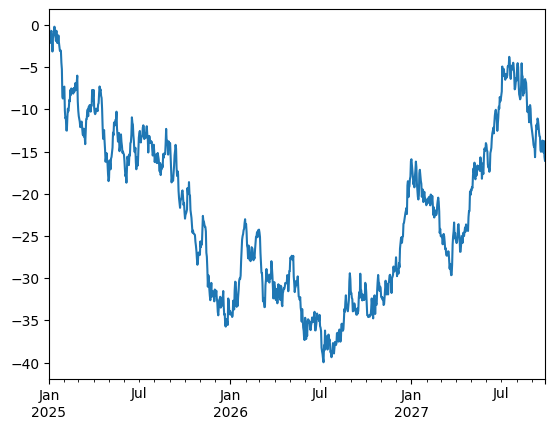

In [85]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2025", periods=1000))
ts = ts.cumsum()
ts.plot()

#### Note
- When using Jupyter, the plot will appear using **plot()**. Otherwise use matplotlib.pyplot.show to show it or matplotlib.pyplot.savefig to write it to a file.
- **plot()** plots all columns:

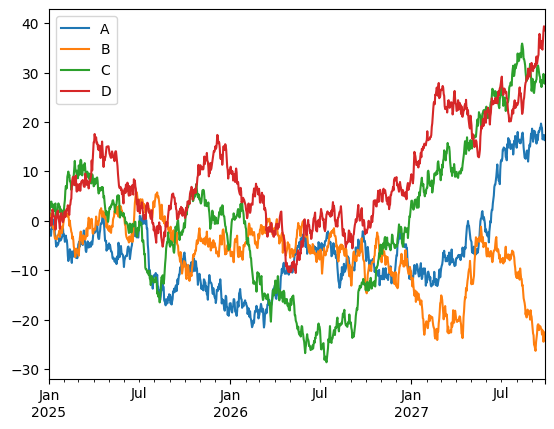

In [86]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)

df = df.cumsum()
df.plot()
plt.legend(loc="best")
plt.show()

#### Importing and exporting data
- See the IO Tools section.
#### CSV
- Writing to a csv file: using **
DataFrame.to_csv()**
```python
df = pd.DataFrame(np.random.randint(0, 5, (10, 5)))
df.to_csv("foo.csv")
```
- Reading from a csv file: using read_csv()
```python
pd.read_csv("foo.csv")
```

#### Parquet
- Writing to a Parquet file:
```python
df.to_parquet("foo.parquet")
```
- Reading from a Parquet file Store using **read_parquet()**:
```python
pd.read_parquet("foo.parquet")
```

#### Excel
- Reading and writing to Excel
- Writing to an excel file using **DataFrame.to_excel()**
```python
df._to_excel("foo.xlsx", sheet_name="Sheet1")
```
- Reading from an excel file **read_excel()**:
```python
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])
```

#### Gotchas
- If you are attempting to perform a boolean operation on a Series or DataFrame you might see an exception like:
```python
if pd.Series([False, True, False]):
    print("I was True")
## Will throw a Value Error
```


### Intro to data structures
- from https://pandas.pydata.org/docs/user_guide/dsintro.html
- We’ll start with a quick, non-comprehensive overview of the fundamental data structures in pandas to get you started. The fundamental behavior about data types, indexing, axis labeling, and alignment apply across all of the objects. To get started, import NumPy and load pandas into your namespace:

In [88]:
import numpy as np
import pandas as pd

- Fundamentally, data alignment is intrinsic. The link between labels and data will not be broken unless done so explicitly by you.

- We’ll give a brief intro to the data structures, then consider all of the broad categories of functionality and methods in separate sections.

#### Series
- Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index. The basic method to create a Series is to call:
```python
s = pd.Series(data, index=index)
```
- Here, **data** can be many different things:
    - a Python dict
    - an ndarray
    - a scalar value (like 5)

- The passed index is a list of axis labels. Thus, this separates into a few cases depending on what data is:
    - From ndarray
- If data is an ndarray, index must be the same length as data. If no index is passed, one will be created having values **[0, ..., len(data) - 1]**.

In [89]:
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])
s

a    0.589968
b   -0.028640
c    0.822202
d   -0.507569
e   -1.162093
dtype: float64

In [90]:
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [91]:
pd.Series(np.random.randn(5))

0    0.442947
1    0.329470
2   -0.691212
3    1.636619
4    0.370854
dtype: float64

#### Note
- pandas supports non-unique index values. If an operation that does not support duplicate index values is attempted, an exception will be raised at that time.

#### From dict
- Series can be instantiated from dicts:

In [92]:
d = {"b": 1, "a": 0, "c": 2}
pd.Series(d)

b    1
a    0
c    2
dtype: int64

- if an index is passed, the values in data corresponding to the labels in the index will be pulled out

In [93]:
d = {"a": 0.0, "b": 1.0, "c": 2.0}
pd.Series(d)


a    0.0
b    1.0
c    2.0
dtype: float64

In [94]:
pd.Series(d, index=["b", "c", "d", "a"])

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64

#### Note
- NaN (not a number) is the standard missing data marker used in pandas.

#### From scalar value
- If data is a scalar value, an index must be provided. The value will be repeated to match the length of index.

In [95]:
pd.Series(5.0, index=["a", "b", "d", "d", "e"])

a    5.0
b    5.0
d    5.0
d    5.0
e    5.0
dtype: float64

#### Series is ndarray-like
- Series acts very similarly to a ndarray and is a valid argument to most NumPy functions. However, operations such as slicing will also slice the index.


In [96]:
s.iloc[0]

np.float64(0.589967756910342)

In [97]:
s.iloc[:3]

a    0.589968
b   -0.028640
c    0.822202
dtype: float64

In [98]:
s[s > s.median()]

a    0.589968
c    0.822202
dtype: float64

In [99]:
s.iloc[[4, 3, 1]] # return the index that has 4, 3, 1

e   -1.162093
d   -0.507569
b   -0.028640
dtype: float64

In [100]:
np.exp(s) # opertions on all elements of s

a    1.803930
b    0.971766
c    2.275505
d    0.601957
e    0.312831
dtype: float64

- **Note**: We will address array-based indexing like s.iloc[[4, 3, 1]] in section on indexing.
- Like a NumPy array, a pandas Series has a single dtype.

In [101]:
s.dtype

dtype('float64')

- This is often a NumPy dtype. However, pandas and 3rd-party libraries extend NumPy’s type system in a few places, in which case the dtype would be an ExtensionDtype. Some examples within pandas are Categorical data and Nullable integer data type. See dtypes for more.

- If you need the actual array backing a **Series**, use **Series.array**.

In [102]:
s.array # could get the array from a series
# useful for operations without the index

<NumpyExtensionArray>
[    np.float64(0.589967756910342), np.float64(-0.028639914248865507),
    np.float64(0.8222020413761709),   np.float64(-0.5075685231949256),
    np.float64(-1.162093322231884)]
Length: 5, dtype: float64

- Accessing the array can be useful when you need to do some operation without the index (to disable automatic alignment, for example).
- Series.array will always be an ExtensionArray. Briefly, an ExtensionArray is a thin wrapper around one or more concrete arrays like a numpy.ndarray. pandas knows how to take an ExtensionArray and store it in a Series or a column of a DataFrame. See dtypes for more.
- While Series is ndarray-like, if you need an actual ndarray, then use **Series.to_numpy()**.

In [103]:
s.to_numpy() # to return a numpy ndarray

array([ 0.58996776, -0.02863991,  0.82220204, -0.50756852, -1.16209332])

- Even if the Series is backed by a ExtensionArray, Series.to_numpy() will return a NumPy ndarray.
#### Series is dict-like
- A Series is also like a fixed-size dict in that you can get and set values by index label:

In [104]:
s["a"] # series is dict-like, could access with their index
# if label is not in the index, then an exception will be raised.

np.float64(0.589967756910342)

In [105]:
s["e"] = 12.0
s

a     0.589968
b    -0.028640
c     0.822202
d    -0.507569
e    12.000000
dtype: float64

In [106]:
"e" in s

True

In [107]:
"f" in s

False

- If a label is not contained in the index, an exception is raised:
```python
s["f"] # will raise a KeyWrror
```

- Using the **Series.get()** method, a missing label will return None or specified default:

In [108]:
s.get("f") # avoid an exception if "f" doesn't not exist

In [109]:
s.get("f", np.nan)

nan

# Vectorized operations and labels alignment with Series
- When working with raw numpy arrays, looping through value-by-value is usually not necessary. The same is true when workign with Series in pandas. Series can also be passed into most Numpy methods expecting an ndarray.

In [110]:
s + s

a     1.179936
b    -0.057280
c     1.644404
d    -1.015137
e    24.000000
dtype: float64

In [111]:
s * 2

a     1.179936
b    -0.057280
c     1.644404
d    -1.015137
e    24.000000
dtype: float64

In [112]:
np.exp(s)

a         1.803930
b         0.971766
c         2.275505
d         0.601957
e    162754.791419
dtype: float64

- A key difference between Series and ndarray is that operations between Series automatically align the data based on labels. Thus, you can write computations without giving condiseration to whether the Series involved have the same labels.

In [113]:
s.iloc[1:] + s.iloc[:-1]

a         NaN
b   -0.057280
c    1.644404
d   -1.015137
e         NaN
dtype: float64

- The result of an operation between unaligned Series will have the union of the indexes involved. If a label is not found in one Series or the other, the result will be marked as missing Nan. Being able to write code without doing any explicit data alignment grants immerse freedom and flexibility in interactive data analysis and research. The integerated data alignment features of the pands data structures set pandas apart from the majority of related tools for working with labeled data.
- **Note**: In general, we chose to make the default result of operations between differently indexed objects yield the union of the indexes in order to avoid loss of information. Having an index label, though the data is missing, is typically important information as part of a computation. You of course have the option of dropping labels with missing data via the dropna function.

# Name attribute
- Series has name attribute
- can be change with the rename() function

In [114]:
s = pd.Series(np.random.randn(5), name="something")
s

0   -1.387881
1    0.041832
2    0.312598
3    0.064934
4    1.386142
Name: something, dtype: float64

In [116]:
s.name

'something'

- The Series name can be assigned automatically in many cases, in particular, when selecting a single column from a DataFrame, the name will be assigned the column label.
- You can rename a Series with the **pandas.Series.rename()** method.

In [110]:
s = s.rename("different")
s.name

'different'

- **Note** that s and s2 refer to different objects.

#### DataFrame
- 2-dimensional labled data structure with columns of potentially different types. Think like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commmonly used pandas object. Like Series, DataFrame accepts many different kinds of input:
    - Dict of 1D ndarrays, lists, dicts, or Series
    - 2-D numpy.ndarray
    - A Series
    - Another DataFrame
- Along the data you can optionally pass **index** (row labels) and **columns** (column labels) arguments. If you pass an index and / or columns, you are guaranteeing the index and / or columns of the resulting DataFrame. Thus, a dict of Series plus a specific index will discard all data not matching up to the passed index. 
- If the axis labels are not passed, they wil be constructed from the input data based on common sense rules.

#### From dict of Series or dicts
- The resulting index will be the union of the indexes of the various Series. If there are any nested dicts, these will first be converted to Series. If no columns are passed, the columns will be the ordered list of dict keys.

In [148]:
# From dict of Series or dicts
d = {
    "one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
    "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"])
}
df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [149]:
pd.DataFrame(d, index=["d", "b", "a"])


,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [150]:
pd.DataFrame(d, index=["d", "b", "a"], columns=["two", "three"])

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


- The row and column labels can be accessed respectively by accessing the index and columns attributes:
- **Note**: When a particular set of columns is passed along with a dict of data, the passed columns override the keys in the dict.

In [151]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [152]:
df.columns

Index(['one', 'two'], dtype='object')

#### From dict of ndarrays / lists
- all ndarrays must share the same length. If an index is passed, it must also be the same length as the arrays. If no index is passed, the result will be range(n), where n is the array length

In [153]:
d = { "one": [1.0, 2.0, 3.0, 4.0], "two": [4.0, 3.0, 2.0, 1.0]}
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [154]:
pd.DataFrame(d, index=["a", "b", "c", "d"])

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


#### From structured or record array
- this case is handled identically to a dict of arrays.


In [155]:
data = np.zeros((2,), dtype=[("A", "i4"), ("B", "f4"), ("C", "S10")]) # dtype alias "a" is deprecated use "S" instead
data[:] = [(1, 2.0, "Hello"), (2, 3.0, "World")]
pd.DataFrame(data)

,A,B,C
0,1,2.0,b'Hello'
1,2,3.0,b'World'


In [156]:
pd.DataFrame(data, index=["first", "second"])

,A,B,C
first,1,2.0,b'Hello'
second,2,3.0,b'World'


In [157]:
pd.DataFrame(data, columns=["C", "A", "B"])

,C,A,B
0,b'Hello',1,2.0
1,b'World',2,3.0


- **Note** DataFrame is not intended to work exactly like a 2-dimensional NumPy ndarray.
#### From a list of dicts

In [158]:
data2 = [{"a": 1, "b": 2}, {"a": 5, "b": 10, "c": 20}] # keys become columns name and values become entry as row
pd.DataFrame(data2)

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [159]:
pd.DataFrame(data2, index=["first", "second"]) # passing the index will create an index

,a,b,c
first,1,2,NaN
second,5,10,20.0


In [160]:
pd.DataFrame(data2, columns=["a", "b"]) # padding the columns will only create those columns

,a,b
0,1,2
1,5,10


#### From a dict of tuples
- can automatically create a MultiIndexed frame by passing a tuples dictionary

In [161]:
pd.DataFrame(
    {
        ("a", "b"): {("A", "B"): 1, ("A", "C"): 2},
        ("a", "a"): {("A", "C"): 3, ("A", "B"): 4},
        ("a", "c"): {("A", "B"): 5, ("A", "C"): 6},
        ("b", "a"): {("A", "C"): 7, ("A", "B"): 8},
        ("b", "b"): {("A", "D"): 9, ("A", "B"): 10}
    }
)

a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

#### From a Series
- the result will be a DataFrame with the same index as the input Series, and with one column whose name is the original name of the Series (only if no other column name provided).

In [162]:
ser = pd.Series(range(3), index=list("abc"), name="ser")
pd.DataFrame(ser)

,ser
a,0
b,1
c,2


#### From a list of namedtuples
- the field names of the first **namedtuple** in the list determine the columns of the DataFrame. THe remaining namedtuples (or tuples) are simply unpacked and their values are fed into the rows of the DataFrame. If any of those tuples is shorter than the first **namedtuple** then the later columns in the corresponding row are marked as missing values. If any are longer than the first **namedtuple**, a ValueError is raised.

In [163]:
from collections import namedtuple

Point = namedtuple("Point", "x y")
pd.DataFrame([Point(0, 0), Point(0, 3), (2, 3)])

,x,y
0,0,0
1,0,3
2,2,3


In [164]:
Point3D = namedtuple("Point3D", "x y z")
pd.DataFrame([Point3D(0, 0, 0), Point3D(0, 3, 5), Point(2, 3)]) # will expand to Point3D and leave z empty for the Point namedtuple

,x,y,z
0,0,0,0.0
1,0,3,5.0
2,2,3,NaN


#### From a list of dataclasses
- Data classes as instroduced in PEP557, can be passed into the DataFrame constructor. Passing a list of dataclasses is equivalent to passing a list of dictionaries
- Please be aware, that all values in teh list should be dataclasses, mixing types in the list would result in a TypeError.

In [165]:
from dataclasses import make_dataclass

Point = make_dataclass("Point", [("x", int), ("y", int)])
pd.DataFrame([Point(0, 0), Point(0, 3), Point(2, 3)])

,x,y
0,0,0
1,0,3
2,2,3


#### Missing data
- To construct a DataFrame with missing data, we use np.nan to represent missing values. Alternatively, you may pass a numpy.MaskedArray as the data argument to the DataFrame constructor, and its masked entries will be considered missing

#### Alternative constructors
- **DataFrame.from_dict()** takes a dict of dicts or a dict of array-like sequences and return a DataFrame. It operates like the DataFrame constructor except for the orient parameter which is "columns" by default, but which can be set to "index" in order to use the dict keys as row labels.

In [166]:
pd.DataFrame.from_dict(dict([("A", [1, 2, 3]), ("B", [4, 5, 6])]))

,A,B
0,1,4
1,2,5
2,3,6


- If you pass orient='index', the keys will be the row labels. In this case, you can also pass the desired column names:

In [167]:
pd.DataFrame.from_dict(
    dict([("A", [1, 2, 3]), ("B", [4, 5, 6])]),
    orient="index",
    columns=["one", "two", "three"],
)

,one,two,three
A,1,2,3
B,4,5,6


#### DataFrame.from_records
- **DataFrame.from_records()** takes a list of tuples or an ndarray with structured dtype. It works analogously to the normal DataFrame constructor, except that the resulting DataFrame index may be a specific field of the structured dtype.

In [168]:
data

array([(1, 2., b'Hello'), (2, 3., b'World')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [169]:
pd.DataFrame.from_records(data, index="C")

,A,B
C,,
b'Hello',1,2.0
b'World',2,3.0


#### Column selection, addition, deletion
- You can treat a DataFrame semantically like a dict of like-indexed Series objects, Getting, setting, and deleting columns works with the same syntax as the analogous dict operations:

In [170]:
df["one"]

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [171]:
df["three"] = df["one"] * df["two"]
df["flag"] = df["one"] > 2
df

,one,two,three,flag
a,1.0,1.0,1.0,False
b,2.0,2.0,4.0,False
c,3.0,3.0,9.0,True
d,NaN,4.0,NaN,False


- Columns can be deleted or popped like with a dict:

In [172]:
# columns can be deleted or popped like with a dict:
del df["two"]
three = df.pop("three")
df

,one,flag
a,1.0,False
b,2.0,False
c,3.0,True
d,NaN,False


- When inserting a scalar value, it will naturally be propagated to fill the column:              


In [173]:
df["foo"] = "bar"
df

,one,flag,foo
a,1.0,False,bar
b,2.0,False,bar
c,3.0,True,bar
d,NaN,False,bar


- When inserting a Series that does not have the same index as the DataFrame, it will be conformed to the DataFrame's index:

In [174]:
df["one_trunc"] = df["one"][:2]
df

,one,flag,foo,one_trunc
a,1.0,False,bar,1.0
b,2.0,False,bar,2.0
c,3.0,True,bar,NaN
d,NaN,False,bar,NaN


- You can insert raw ndarrays but their length must match the length of the DataFrame's index.
- By default, columns get inserted at the end. DataFrame.insert() inserts at a particular location in the columns:

In [175]:
df.insert(1, "bar", df["one"])
df

,one,bar,flag,foo,one_trunc
a,1.0,1.0,False,bar,1.0
b,2.0,2.0,False,bar,2.0
c,3.0,3.0,True,bar,NaN
d,NaN,NaN,False,bar,NaN


#### Assigning new columns in method chains
- Inspired by dplyr's mutate verb, DataFrame has an assign() method that allows you to easily create new columns that are potentially derived from existing columns

In [176]:
iris = pd.read_csv("data/iris.csv")
iris.head()

,Unnamed: 0,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Iris-setosa
2,2,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5.0,3.6,1.4,0.2,Iris-setosa


In [177]:
iris.assign(sepal_ratio=iris["SepalWidth"] / iris["SepalLength"]).head()
# We inserted a precomputed value. We can also pass in a function of one argument to be evaluated on the DataFrame being assigned to.

,Unnamed: 0,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,sepal_ratio
0,0,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,1,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,2,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,3,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,4,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


- In the example above, we inserted a precomputed value. We can also pass in a function of one argument to be evaluated on the DataFrame being assigned to.

In [178]:
iris.assign(sepal_ratio=lambda x: (x["SepalWidth"] / x["SepalLength"])).head()
# assign() always returns a copy of the data, leaving the original DataFrame untouched.

,Unnamed: 0,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,sepal_ratio
0,0,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,1,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,2,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,3,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,4,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


- **assign()** always returns a copy of the data, leaving the original DataFrame untouched.
- Passing a callable, as opposed to an actual value to be inserted, is useful when you don't have a reference to the DataFrame at hand. This is common when using **assign()** in a chain of operations. 
- For example, whe can limit the DataFrame to just those observations with a Sepal Length greater than 5, calculate the ratio, and plot:

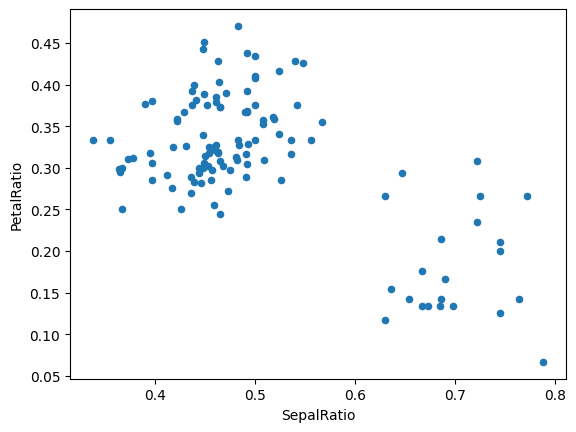

In [179]:
(
    iris.query("SepalLength > 5")
    .assign(
        SepalRatio=lambda x: x.SepalWidth / x.SepalLength,
        PetalRatio=lambda x: x.PetalWidth / x.PetalLength,
    )
    .plot(kind="scatter", x="SepalRatio", y="PetalRatio")
)

plt.show()

- Since a function is passed in, the function is computed on the DataFrame being assigned to. Importantly, this is the DataFrame that's been filtered to those rows with sepal length greater than 5. The filtering happens first, then ratio calculations. This is an example where we didn't have a reference tot he filtered DataFrame available.
- The function signature for assign() is simple **kwargs. The keys are the column names for the new fields, and the values are either a value to be inserted (for example, a Series or Numpy array), or a function of one argument to be called on the DataFrame. A copy of the original DataFrame is returned, with the new values inserted.
- The order of **kwargs is preserved. This allows for dependent assignment, where an expression later in **kwargs can refer to a column created earlier in the same assign().

In [180]:
dfa = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})
# in the second expression, x["C"] will refer to the newly created column, that's equal to dfa["A"] + dfa["B"]
dfa.assign(C=lambda x: x["A"] + x["B"], D=lambda x: x["A"] + x["C"])


,A,B,C,D
0,1,4,5,6
1,2,5,7,9
2,3,6,9,12


- In the second expression, x['C'] will refer to the newly created column, that’s equal to dfa['A'] + dfa['B'].

#### Indexing / selection
- The basic of indexing are as follow:

| Operation                         | Syntax              | Result       |
|----------                         | -------             | -----        |
| Select column                     | df[col]             | Series       |
| Select row by label               | df.loc[label]       | Series       |
| Select row by integer location    | df.iloc[loc]        | Series       |
| Slice rows                        | df[1:10]            | DataFrame    |
| Select rows by boolean vector     | df[bool_vec]        | DataFrame    |


In [181]:
df.loc["b"]

one            2.0
bar            2.0
flag         False
foo            bar
one_trunc      2.0
Name: b, dtype: object

In [182]:
df.iloc[2]

one           3.0
bar           3.0
flag         True
foo           bar
one_trunc     NaN
Name: c, dtype: object

- For a more exhaustive treatment of sophisticated label-based indexing and slicing, see the section on indexing. We will address the fundamentals of reindexing / conforming to new sets of labels in the section on reindexing.

#### Data alignment and arithmetic
- Data alignment between DataFrame objects automatically align on both the columns and the index (row labels). Again, the resulting object will have the union of the column and row labels.

In [183]:
df = pd.DataFrame(np.random.randn(10, 4), columns=["A", "B", "C", "D"])
df2 = pd.DataFrame(np.random.randn(7, 3), columns=["A", "B", "C"])
df + df2

,A,B,C,D
0,1.103244,0.007473,-0.527245,NaN
1,2.277219,1.532439,1.599754,NaN
2,1.401439,1.655687,3.408455,NaN
3,0.074127,1.637635,-1.278985,NaN
4,0.091335,-0.467919,2.431700,NaN
5,0.290086,2.416885,0.337879,NaN
6,-1.155592,-0.907676,-0.799394,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


- When doing an operation between DataFrame and Series, the default behavior is to align the Series index on the DataFrame columns, thus broadcasting row-wise. For Example:

In [184]:
df - df.iloc[0]

,A,B,C,D
0,0.000000,0.000000,0.000000,0.000000
1,2.051876,1.574518,2.818806,-1.442492
2,0.370360,2.049575,1.538398,-1.354896
3,1.814194,1.620044,0.812876,0.018909
4,1.753047,-0.539592,2.309487,0.588294
5,1.311795,1.201201,1.535951,-0.336535
6,0.524550,-0.143748,2.219127,-0.813182
7,0.376506,1.570767,1.801063,1.782566
8,-0.057336,1.254088,-0.401797,0.474193
9,0.331016,-1.262204,0.612425,0.560622


- For explicit control over the matching and broadcasting behavior, see the section on flexible binary operations.
- Arithmetic operations with scalars operate element-wise:

In [185]:
df * 5 + 2

,A,B,C,D
0,-2.183908,-0.161557,-4.406533,2.884723
1,8.075472,7.711033,9.687498,-4.327735
2,-0.332106,10.086316,3.285457,-3.889755
3,6.887061,7.938662,-0.342150,2.979270
4,6.581327,-2.859519,7.140904,5.826194
5,4.375068,5.844450,3.273220,1.202049
6,0.438843,-0.880298,6.689100,-1.181185
7,-0.301379,7.692276,4.598781,11.797555
8,-2.470589,6.108885,-6.415516,5.255687
9,-0.528830,-6.472577,-1.344405,5.687835


In [186]:
1 /df

,A,B,C,D
0,-1.195055,-2.313147,-0.780453,5.651483
1,0.822981,0.875498,0.650407,-0.790172
2,-2.143985,0.618329,3.889667,-0.848932
3,1.023110,0.841941,-2.134791,5.105845
4,1.091387,-1.028908,0.972592,1.306782
5,2.105203,1.300576,3.927050,-6.266051
6,-3.202753,-1.735931,1.066303,-1.571742
7,-2.172611,0.878383,1.923979,0.510331
8,-1.118421,1.216875,-0.594141,1.535774
9,-1.977199,-0.590139,-1.495034,1.355809


In [187]:
df ** 4

,A,B,C,D
0,0.490285,0.034929,2.695331,0.000980
1,2.179918,1.702075,5.588046,2.565152
2,0.047327,6.841051,0.004369,1.925347
3,0.912664,1.990098,0.048148,0.001471
4,0.704831,0.892264,1.117578,0.342916
5,0.050912,0.349508,0.004205,0.000649
6,0.009504,0.110121,0.773532,0.163861
7,0.044882,1.679824,0.072979,14.743167
8,0.639115,0.456053,8.024964,0.179759
9,0.065433,8.244839,0.200168,0.295942


- Boolean operators operate element-wise as well:

In [188]:
df1 = pd.DataFrame({"a": [1, 0, 1], "b": [0, 1, 1]}, dtype=bool)
df2 = pd.DataFrame({"a": [0, 1, 1], "b": [1, 1, 0]}, dtype=bool)
df1 & df2

,a,b
0,False,False
1,False,True
2,True,False


In [189]:
df1 | df2

,a,b
0,True,True
1,True,True
2,True,True


In [190]:
df1 ^ df2 # xor operation

,a,b
0,True,True
1,True,False
2,False,True


In [191]:
-df1

,a,b
0,False,True
1,True,False
2,False,False


#### Transposing
- To transpose, access the "T" attribute or DataFrame.transpose(), similar to an ndarray:

In [193]:
# only show the first 5 rows
df[:5].T

,0,1,2,3,4
A,-0.836782,1.215094,-0.466421,0.977412,0.916265
B,-0.432311,1.142207,1.617263,1.187732,-0.971904
C,-1.281307,1.537500,0.257091,-0.468430,1.028181
D,0.176945,-1.265547,-1.177951,0.195854,0.765239


#### DataFrame interoperability with Numpy functions
- Most numpy functions can be called directly on Series and DataFrame

In [194]:
np.exp(df)

,A,B,C,D
0,0.433102,0.649007,0.277674,1.193565
1,3.370612,3.133676,4.652941,0.282085
2,0.627243,5.039280,1.293163,0.307909
3,2.657570,3.279636,0.625984,1.216349
4,2.499937,0.378362,2.795975,2.149508
5,1.608036,2.157370,1.290002,0.852493
6,0.731812,0.562109,2.554407,0.529280
7,0.631110,3.121942,1.681618,7.095856
8,0.408968,2.274538,0.185796,1.917721
9,0.603043,0.183688,0.512281,2.090842


In [195]:
np.asarray(df)

array([[-0.83678159, -0.43231141, -1.28130651,  0.17694469],
       [ 1.21509443,  1.14220661,  1.53749956, -1.26554705],
       [-0.4664211 ,  1.61726321,  0.25709145, -1.17795101],
       [ 0.97741222,  1.18773238, -0.46843002,  0.19585395],
       [ 0.91626538, -0.97190387,  1.02818072,  0.7652388 ],
       [ 0.47501356,  0.76888997,  0.25464409, -0.15959016],
       [-0.31223134, -0.57605961,  0.93782006, -0.63623693],
       [-0.46027576,  1.13845521,  0.51975619,  1.95951096],
       [-0.89411771,  0.82177693, -1.6831033 ,  0.65113737],
       [-0.50576598, -1.69451549, -0.66888108,  0.73756704]])

- DataFrame is not intended to be a drop-in replacement for ndarray as its indexing semantics and data model are quite different in places from an n-dimensional array.
- Series implements **__ array_ufunc __()**, which allows it to work with Numpy's universal functions.
- The ufunc is applied to the underlying array in a Series.

In [196]:
ser = pd.Series([1, 2, 3, 4])
np.exp(ser)

0     2.718282
1     7.389056
2    20.085537
3    54.598150
dtype: float64

- When multiple Series are passed to a ufunc, they are aligned before performing the operation.
- Like other parts of the library, pandas will automatically align labeled inputs as part of the ufunc with multiple inputs. For example, using numpy.remainder() on two pandas.Series with differently ordered labels will align before the operations.

In [197]:
ser1 = pd.Series([1, 2, 3], index=["a", "b", "c"])
ser2 = pd.Series([1, 3, 5], index=["b", "a", "c"])
np.remainder(ser1, ser2)


a    1
b    0
c    3
dtype: int64

- As usual, the union of the two indices is taken, and non-overlapping values are filled with missing values.

In [198]:
# As usual, the union of the two indices is taken, and non-overlapping values are filled with missing values.
ser3 = pd.Series([2, 4, 6], index=["b", "c", "d"])
np.remainder(ser1, ser3)

a    NaN
b    0.0
c    3.0
d    NaN
dtype: float64

- When a binary ufunc is applied to a Series and Index, the Series implementation takes precedence and a Series is returned.

In [199]:
ser = pd.Series([1, 2, 3])
idx = pd.Index([4, 5, 6])
np.maximum(ser, idx)

0    4
1    5
2    6
dtype: int64

- Numpy ufuncs are safe to apply to Series backed by non-ndarray arrays, for example arrays.SpareArray. If possible, the ufunc is applied without converting the underlying data to an ndarray.

#### Console display
- A very large DataFrame will be truncated to display them in the consle. You can also get a summary using info().

In [200]:
print(df)

          A         B         C         D
0 -0.836782 -0.432311 -1.281307  0.176945
1  1.215094  1.142207  1.537500 -1.265547
2 -0.466421  1.617263  0.257091 -1.177951
3  0.977412  1.187732 -0.468430  0.195854
4  0.916265 -0.971904  1.028181  0.765239
5  0.475014  0.768890  0.254644 -0.159590
6 -0.312231 -0.576060  0.937820 -0.636237
7 -0.460276  1.138455  0.519756  1.959511
8 -0.894118  0.821777 -1.683103  0.651137
9 -0.505766 -1.694515 -0.668881  0.737567


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       10 non-null     float64
 1   B       10 non-null     float64
 2   C       10 non-null     float64
 3   D       10 non-null     float64
dtypes: float64(4)
memory usage: 452.0 bytes


- However, using DataFrame.to_string() will return a string representation of the DataFrame in tabular form, though it won't always fit the console width:

In [202]:
print(df.to_string())

          A         B         C         D
0 -0.836782 -0.432311 -1.281307  0.176945
1  1.215094  1.142207  1.537500 -1.265547
2 -0.466421  1.617263  0.257091 -1.177951
3  0.977412  1.187732 -0.468430  0.195854
4  0.916265 -0.971904  1.028181  0.765239
5  0.475014  0.768890  0.254644 -0.159590
6 -0.312231 -0.576060  0.937820 -0.636237
7 -0.460276  1.138455  0.519756  1.959511
8 -0.894118  0.821777 -1.683103  0.651137
9 -0.505766 -1.694515 -0.668881  0.737567


- Wide DataFrames will be printed across multiple rows by default:

In [164]:
pd.DataFrame(np.random.randn(3, 12))

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.615705,1.539416,-2.070189,-0.297260,0.254309,-0.060148,0.784718,-0.385999,1.025438,-0.122082,-0.991926,-2.112608
1,0.702045,0.932579,-0.868737,0.032153,0.392896,-1.227749,0.951782,-1.433993,1.077944,-0.243191,-0.722120,-0.637924
2,-0.189125,1.207923,2.219423,-0.587393,-0.634927,-0.366614,-0.612546,0.348071,0.773710,1.341101,-0.397347,0.873845


- You can change how much to print on a single row by setting the display.width option:

In [203]:
pd.set_option("display.width", 40) # default is 80
pd.DataFrame(np.random.randn(3, 12))

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.177115,-0.948060,-0.092260,0.101342,-1.594821,0.619683,-0.611986,0.282537,-2.111467,-0.724926,-0.936956,0.123554
1,1.146145,-1.538590,0.508895,0.583752,-1.234970,-0.213049,0.513745,-0.271441,1.753825,-0.539983,-0.803787,0.586100
2,-2.150850,0.996446,1.553926,0.951839,-1.584261,1.062159,1.085375,-0.254013,-0.525309,-0.976481,-0.119531,-0.633217


- You can adjust the max width of the individual columns by setting display.max_colwidth

In [204]:
datafile = {
    "filename": ["filename_01", "filename_02"],
    "path": [
        "media/user_name/storage/folder_01/filename_01",
        "media/user_name/storage/folder_02/filename_02"
    ],
}
pd.set_option("display.max_colwidth", 30)
pd.DataFrame(datafile)

,filename,path
0,filename_01,media/user_name/storage/fo...
1,filename_02,media/user_name/storage/fo...


In [205]:
pd.set_option("display.max_colwidth", 100)
pd.DataFrame(datafile)

,filename,path
0,filename_01,media/user_name/storage/folder_01/filename_01
1,filename_02,media/user_name/storage/folder_02/filename_02


- You can also disable this feature via the expand_frame_repr option. This will print the table in one block.

#### DataFrame column attribute access and IPython completion
- If a DataFrame column label is valid Python variable name, the column can be accessed like an attribute:

In [206]:
df = pd.DataFrame({"foo1": np.random.randn(5), "foo2": np.random.randn(5)})
df

,foo1,foo2
0,0.079839,0.408861
1,-0.877728,2.205254
2,-0.339943,0.287031
3,0.133308,-1.097953
4,1.107020,0.860298


In [171]:
df.foo1

0    0.235988
1   -1.251926
2   -1.542614
3    0.164151
4    0.268751
Name: foo1, dtype: float64

### Essential casic functionality
- From https://pandas.pydata.org/docs/user_guide/basics.html
- Here we discuss a lot of the essential functionality common to the pandas data structures. To begin, let’s create some example objects like we did in the 10 minutes to pandas section:

In [207]:
index = pd.date_range("1/1/2000", periods=8)
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])
df = pd.DataFrame(np.random.randn(8, 3), index=index, columns=["A", "B", "C"])

#### Head and tail
- To view a small sample of a Series or DataFrame object, use the **head()** and **tail()** methods. The default number of elements to display is five, but you may pass a custom number.

In [208]:
long_series = pd.Series(np.random.randn(1000))
long_series.head()

0    0.048241
1   -0.868987
2   -0.885684
3   -0.794151
4   -1.030949
dtype: float64

In [209]:
long_series.tail(3)

997   -1.630735
998   -0.023207
999    0.613379
dtype: float64

#### Attributes and underlying data
- pandas objects have a number of attributes enabling you to access the metadata
    - shape: gives the axis dimensions of the object, consistent with ndarray
    - Axis labels
        - Series: index (only axis)
        - DataFrame: index (rows) and columns

- **Note**, these attributes can be safely assigned to!

In [210]:
df[:2]

,A,B,C
2000-01-01,-2.079043,-0.606770,-1.001487
2000-01-02,-2.403859,-0.153856,-1.194994


In [211]:
df.columns = [x.lower() for x in df.columns]
df

,a,b,c
2000-01-01,-2.079043,-0.606770,-1.001487
2000-01-02,-2.403859,-0.153856,-1.194994
2000-01-03,0.636973,-0.384860,0.013339
2000-01-04,-1.515879,0.834315,3.971706
2000-01-05,0.879555,-0.439719,-1.399776
2000-01-06,-1.686704,0.668547,0.288634
2000-01-07,0.492575,-0.279400,0.363138
2000-01-08,-0.285720,-0.846342,-0.383373


- pandas objects (Index, Series, DataFrame) can be thought of as containers for arrays, which hold the actual data and do the actual computation. For many types, the underlying array is a numpy.ndarray. However, pandas and 3rd party libraries may extend NumPy’s type system to add support for custom arrays (see dtypes).
- To get the actual data inside a Index or Series, use the .array property

In [212]:
s.array

<NumpyExtensionArray>
[np.float64(0.32204597666379375),
 np.float64(0.09990255159315434),
  np.float64(0.2411232018259065),
 np.float64(-1.1489152259742725),
 np.float64(-0.8891359720047747)]
Length: 5, dtype: float64

In [213]:
s.index.array

<NumpyExtensionArray>
['a', 'b', 'c', 'd', 'e']
Length: 5, dtype: object

- array will always be an ExtensionArray. The exact details of what an ExtensionArray is and why pandas uses them are a bit beyond the scope of this introduction. See dtypes for more.

- If you know you need a NumPy array, use **to_numpy(**) or **numpy.asarray()**.

In [214]:
s.to_numpy()

array([ 0.32204598,  0.09990255,  0.2411232 , -1.14891523, -0.88913597])

In [215]:
np.asarray(s)

array([ 0.32204598,  0.09990255,  0.2411232 , -1.14891523, -0.88913597])

- When the Series or Index is backed by an ExtensionArray, to_numpy() may involve copying data and coercing values. See dtypes for more.
- to_numpy() gives some control over the dtype of the resulting numpy.ndarray. For example, consider datetimes with timezones. NumPy doesn’t have a dtype to represent timezone-aware datetimes, so there are two possibly useful representations:
- An object-dtype numpy.ndarray with Timestamp objects, each with the correct tz
- A datetime64[ns] -dtype numpy.ndarray, where the values have been converted to UTC and the timezone discarded
- Timezones may be preserved with dtype=object

In [217]:
ser = pd.Series(pd.date_range("2000", periods=2, tz="CET"))

In [218]:
ser.to_numpy(dtype=object)

array([Timestamp('2000-01-01 00:00:00+0100', tz='CET'),
       Timestamp('2000-01-02 00:00:00+0100', tz='CET')], dtype=object)

- Or thrown away with **dtype="datetime64[ns]")**

In [219]:
ser.to_numpy(dtype="datetime64[ns]")

array(['1999-12-31T23:00:00.000000000', '2000-01-01T23:00:00.000000000'],
      dtype='datetime64[ns]')

- Getting the “raw data” inside a DataFrame is possibly a bit more complex. When your DataFrame only has a single data type for all the columns, **DataFrame.to_numpy()** will return the underlying data:

In [220]:
df.to_numpy()

array([[-2.07904273, -0.6067696 , -1.00148723],
       [-2.40385911, -0.15385605, -1.19499401],
       [ 0.63697281, -0.38486017,  0.01333866],
       [-1.51587887,  0.83431502,  3.97170562],
       [ 0.87955488, -0.43971908, -1.39977559],
       [-1.68670429,  0.66854665,  0.28863393],
       [ 0.49257516, -0.27939985,  0.36313769],
       [-0.28571972, -0.84634231, -0.38337275]])

- If a DataFrame contains homogeneously-typed data, the ndarray can actually be modified in-place, and the changes will be reflected in the data structure. For heterogeneous data (e.g. some of the DataFrame’s columns are not all the same dtype), this will not be the case. The values attribute itself, unlike the axis labels, cannot be assigned to.
- **Note**: When working with heterogeneous data, the dtype of the resulting ndarray will be chosen to accommodate all of the data involved. For example, if strings are involved, the result will be of object dtype. If there are only floats and integers, the resulting array will be of float dtype.
- In the past, pandas recommended Series.values or DataFrame.values for extracting the data from a Series or DataFrame. You’ll still find references to these in old code bases and online. Going forward, we recommend avoiding **.values** and using **.array** or **.to_numpy()**. .values has the following drawbacks:
- When your Series contains an extension type, it’s unclear whether Series.values returns a NumPy array or the extension array. **Series.array** will always return an ExtensionArray, and will never copy data. Series.to_numpy() will always return a NumPy array, potentially at the cost of copying / coercing values.
- When your DataFrame contains a mixture of data types, DataFrame.values may involve copying data and coercing values to a common dtype, a relatively expensive operation. **DataFrame.to_numpy()**, being a method, makes it clearer that the returned NumPy array may not be a view on the same data in the DataFrame.

#### Accelerated operations
- pandas has support for accelerating certain types of binary numerical and boolean operations using the numexpr library and the bottleneck libraries.
- These libraries are especially useful when dealing with large data sets, and provide large speedups. numexpr uses smart chunking, caching, and multiple cores. bottleneck is a set of specialized cython routines that are especially fast when dealing with arrays that have nans.
- Here is a sample (using 100 column x 100,000 row DataFrames):

| Operation | 0.11.0 (ms) | Prior Version (ms) | Ratio to Prior |
| ------------- | -------------- | ------------ | --------------- |
| df1 > df2 | |13.32 | 125.35 | 0.1063 |
| df1 * df2 | 21.71 | 36.63 | 0.5928 |
| df1 + df2 | 22.04 | 36.50 | 0.6039 |

- You are highly encouraged to install both libraries. See the section Recommended Dependencies for more installation info.

- These are both enabled to be used by default, you can control this by setting the options:
```python
pd.set_option("compute.use_bottleneck", False)
pd.set_option("compute_use_numexpr", False)
```

#### Flexible binary operations
- With binary operations between pandas data structures, there are two key points of interest:
    - Broadcasting behavior between higher- (e.g. DataFrame) and lower-dimensional (e.g. Series) objects.
    - Missing data in computations.

- We will demonstrate how to manage these issues independently, though they can be handled simultaneously.

#### Matching / broadcasting behavior
- DataFrame has the methods add(), sub(), mul(), div() and related functions radd(), rsub(), … for carrying out binary operations. For broadcasting behavior, Series input is of primary interest. Using these functions, you can use to either match on the index or columns via the axis keyword:

In [221]:
df = pd.DataFrame(
    {
        "one": pd.Series(np.random.randn(3), index=["a", "b", "c"]),
        "two": pd.Series(np.random.randn(4), index=["a", "b", "c", "d"]),
        "three": pd.Series(np.random.randn(3), index=["b", "c", "d"]),
    }
)
df

,one,two,three
a,-0.129219,-2.074897,NaN
b,0.887637,0.205021,-2.188288
c,0.243585,0.002944,0.802624
d,NaN,1.671966,-0.594824


In [222]:
row = df.iloc[1]
column = df["two"]
df.sub(row, axis="columns")

,one,two,three
a,-1.016856,-2.279918,NaN
b,0.000000,0.000000,0.000000
c,-0.644053,-0.202076,2.990912
d,NaN,1.466946,1.593465


In [223]:
df.sub(row, axis=1)

,one,two,three
a,-1.016856,-2.279918,NaN
b,0.000000,0.000000,0.000000
c,-0.644053,-0.202076,2.990912
d,NaN,1.466946,1.593465


In [224]:
df.sub(column, axis="index")

,one,two,three
a,1.945678,0.0,NaN
b,0.682617,0.0,-2.393309
c,0.240641,0.0,0.799680
d,NaN,0.0,-2.266790


In [225]:
df.sub(column, axis=0)

,one,two,three
a,1.945678,0.0,NaN
b,0.682617,0.0,-2.393309
c,0.240641,0.0,0.799680
d,NaN,0.0,-2.266790


- Furthermore you can align a level of a MultiIndexed DataFrame with a Series.

In [227]:
dfmi = df.copy()
dfmi.index = pd.MultiIndex.from_tuples(
    [(1, "a"), (1, "b"), (1, "c"), (2, "a")], names=["first", "second"]
)
dfmi.sub(column, axis=0, level="second")

one       two  \
first second                       
1     a       1.945678  0.000000   
      b       0.682617  0.000000   
      c       0.240641  0.000000   
2     a            NaN  3.746863   

                 three  
first second            
1     a            NaN  
      b      -2.393309  
      c       0.799680  
2     a       1.480073

- Series and Index also support the **divmod()** builtin. This function takes the floor division and modulo operation at the same time returning a two-tuple of the same type as the left hand side. For example:

In [228]:
s = pd.Series(np.arange(10))
s

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64

In [229]:
div, rem = divmod(s, 3)
div

0    0
1    0
2    0
3    1
4    1
5    1
6    2
7    2
8    2
9    3
dtype: int64

In [230]:
rem

0    0
1    1
2    2
3    0
4    1
5    2
6    0
7    1
8    2
9    0
dtype: int64

In [231]:
idx = pd.Index(np.arange(10))
idx

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

In [232]:
div, rem = divmod(idx, 3)
div

Index([0, 0, 0, 1, 1, 1, 2, 2, 2, 3], dtype='int64')

In [233]:
rem

Index([0, 1, 2, 0, 1, 2, 0, 1, 2, 0], dtype='int64')

- We can also do elementwise **divmod()**:

In [234]:
div, rem = divmod(s, [2, 2, 3, 3, 4, 4, 5, 5, 6, 6])
div

0    0
1    0
2    0
3    1
4    1
5    1
6    1
7    1
8    1
9    1
dtype: int64

In [235]:
rem

0    0
1    1
2    2
3    0
4    0
5    1
6    1
7    2
8    2
9    3
dtype: int64

#### Missing data / operations with fill values
- In Series and DataFrame, the arithmetic functions have the option of inputting a fill_value, namely a value to substitute when at most one of the values at a location are missing. For example, when adding two DataFrame objects, you may wish to treat NaN as 0 unless both DataFrames are missing that value, in which case the result will be NaN (you can later replace NaN with some other value using **fillna** if you wish).

In [236]:
df2 = df.copy()
df2.loc["a", "three"] = 1.0
df

,one,two,three
a,-0.129219,-2.074897,NaN
b,0.887637,0.205021,-2.188288
c,0.243585,0.002944,0.802624
d,NaN,1.671966,-0.594824


In [237]:
df2

,one,two,three
a,-0.129219,-2.074897,1.000000
b,0.887637,0.205021,-2.188288
c,0.243585,0.002944,0.802624
d,NaN,1.671966,-0.594824


In [238]:
df + df2

,one,two,three
a,-0.258438,-4.149794,NaN
b,1.775275,0.410041,-4.376576
c,0.487170,0.005888,1.605247
d,NaN,3.343932,-1.189647


In [239]:
df.add(df2, fill_value=0)

,one,two,three
a,-0.258438,-4.149794,1.000000
b,1.775275,0.410041,-4.376576
c,0.487170,0.005888,1.605247
d,NaN,3.343932,-1.189647


#### Flexible comparisons
- Series and DataFrame have the binary comparison methods **eq, ne, lt, gt, le, and ge** whose behavior is analogous to the binary arithmetic operations described above:

In [240]:
df.gt(df2)

,one,two,three
a,False,False,False
b,False,False,False
c,False,False,False
d,False,False,False


In [241]:
df2.ne(df)

,one,two,three
a,False,False,True
b,False,False,False
c,False,False,False
d,True,False,False


- These operations produce a pandas object of the same type as the left-hand-side input that is of dtype bool. These boolean objects can be used in indexing operations, see the section on Boolean indexing.

#### Boolean reductions
- You can apply the reductions: **empty, any(), all(), and bool()** to provide a way to summarize a boolean result.

In [243]:
(df > 0).all()

one      False
two      False
three    False
dtype: bool

In [244]:
(df > 0).any()

one      True
two      True
three    True
dtype: bool

In [245]:
(df > 0).any().any()

np.True_

- You can test if a pandas object is empty, via the empty property.

In [246]:
df.empty

False

In [247]:
pd.DataFrame(columns=list("ABC")).empty

True

#### Warning: Asserting the truthiness of a pandas object will raise an error, as the testing of the emptiness or values is ambiguous.

#### Comparing if objects are equivalent
- Often you may find that there is more than one way to compute the same result. As a simple example, consider **df + df** and **df * 2**. To test that these two computations produce the same result, given the tools shown above, you might imagine using **(df + df == df * 2).all()**. But in fact, this expression is False:

In [248]:
df + df == df * 2

,one,two,three
a,True,True,False
b,True,True,True
c,True,True,True
d,False,True,True


In [249]:
(df + df == df * 2).all()

one      False
two       True
three    False
dtype: bool

- Notice that the boolean DataFrame df + df == df * 2 contains some False values! This is because NaNs do not compare as equals:

In [250]:
np.nan == np.nan

False

- So, NDFrames (such as Series and DataFrames) have an **equals()** method for testing equality, with NaNs in corresponding locations treated as equal.

In [251]:
(df + df).equals(df * 2)

True

- **Note** that the Series or DataFrame index needs to be in the same order for equality to be True:

In [252]:
df1 = pd.DataFrame({"col": ["foo", 0, np.nan]})
df2 = pd.DataFrame({"col": [np.nan, 0, "foo"]}, index=[2, 1, 0])
df1.equals(df2)

False

In [253]:
df1.equals(df2.sort_index())

True

#### Comparing array-like objects
- You can conveniently perform element-wise comparisons when comparing a pandas data structure with a scalar value:

In [254]:
pd.Series(["foo", "bar", "baz"]) == "foo"

0     True
1    False
2    False
dtype: bool

In [255]:
pd.Index(["foo", "bar", "baz"]) == "foo"

array([ True, False, False])

- pandas also handles element-wise comparisons between different array-like objects of the same length:

In [256]:
pd.Series(["foo", "bar", "baz"]) == pd.Index(["foo", "bar", "qux"])

0     True
1     True
2    False
dtype: bool

In [257]:
pd.Series(["foo", "bar", "baz"]) == np.array(["foo", "bar", "qux"])

0     True
1     True
2    False
dtype: bool

- Trying to compare Index or Series objects of different lengths will raise a ValueError:
```python
pd.Series(['foo', 'bar', 'baz']) == pd.Series(['foo', 'bar'])
# ValueError
```

#### Combining overlapping data sets
- A problem occasionally arising is the combination of two similar data sets where values in one are preferred over the other. An example would be two data series representing a particular economic indicator where one is considered to be of “higher quality”. However, the lower quality series might extend further back in history or have more complete data coverage. As such, we would like to combine two DataFrame objects where missing values in one DataFrame are conditionally filled with like-labeled values from the other DataFrame. The function implementing this operation is **combine_first()**, which we illustrate:

In [258]:
df1 = pd.DataFrame(
    {"A": [1.0, np.nan, 3.0, 5.0, np.nan], "B": [np.nan, 2.0, 3.0, np.nan, 6.0]}
)
df2 = pd.DataFrame(
    {
        "A": [5.0, 2.0, 4.0, np.nan, 3.0, 7.0],
        "B": [np.nan, np.nan, 3.0, 4.0, 6.0, 8.0],
    }
)
df1

,A,B
0,1.0,NaN
1,NaN,2.0
2,3.0,3.0
3,5.0,NaN
4,NaN,6.0


In [259]:
df2

,A,B
0,5.0,NaN
1,2.0,NaN
2,4.0,3.0
3,NaN,4.0
4,3.0,6.0
5,7.0,8.0


In [260]:
df1.combine_first(df2)

,A,B
0,1.0,NaN
1,2.0,2.0
2,3.0,3.0
3,5.0,4.0
4,3.0,6.0
5,7.0,8.0


#### General DataFrame combine
- The **combine_first()** method above calls the more general **DataFrame.combine()**. This method takes another DataFrame and a combiner function, aligns the input DataFrame and then passes the combiner function pairs of Series (i.e., columns whose names are the same).
- So, for instance, to reproduce **combine_first(**) as above:

In [262]:
def combiner(x, y):
    return np.where(pd.isna(x), y, x)

df1.combine(df2, combiner)

,A,B
0,1.0,NaN
1,2.0,2.0
2,3.0,3.0
3,5.0,4.0
4,3.0,6.0
5,7.0,8.0


#### Descriptive statistics
- There exists a large number of methods for computing descriptive statistics and other related operations on Series, DataFrame. Most of these are aggregations (hence producing a lower-dimensional result) like **sum(), mean(), and quantile()**, but some of them, like **cumsum(**) and **cumprod()**, produce an object of the same size. Generally speaking, these methods take an axis argument, just like ndarray.{sum, std, …}, but the axis can be specified by name or integer:
    - Series: no axis argument needed
    - DataFrame: “index” (axis=0, default), “columns” (axis=1)

- For example:

In [263]:
df

,one,two,three
a,-0.129219,-2.074897,NaN
b,0.887637,0.205021,-2.188288
c,0.243585,0.002944,0.802624
d,NaN,1.671966,-0.594824


In [264]:
df.mean(0)

one      0.334001
two     -0.048742
three   -0.660163
dtype: float64

In [265]:
df.mean(1)

a   -1.102058
b   -0.365210
c    0.349718
d    0.538571
dtype: float64

- All such methods have a skipna option signaling whether to exclude missing data (True by default):

In [266]:
df.sum(0, skipna=False)

one           NaN
two     -0.194966
three         NaN
dtype: float64

In [267]:
df.sum(axis=1, skipna=True)

a   -2.204116
b   -1.095630
c    1.049153
d    1.077143
dtype: float64

- Combined with the broadcasting / arithmetic behavior, one can describe various statistical procedures, like standardization (rendering data zero mean and standard deviation of 1), very concisely:

In [ ]:
ts_stand = (df - df.mean()) / df.std()
ts_stand.std()

one      1.0
two      1.0
three    1.0
dtype: float64

In [271]:
xs_stand = df.sub(df.mean(1), axis=0).div(df.std(1), axis=0)
xs_stand.std(1)

a    1.0
b    1.0
c    1.0
d    1.0
dtype: float64

- Note that methods like **cumsum(**) and **cumprod()** preserve the location of NaN values. This is somewhat different from **expanding()** and **rolling()** since NaN behavior is furthermore dictated by a min_periods parameter.

In [272]:
df.cumsum()

,one,two,three
a,-0.129219,-2.074897,NaN
b,0.758418,-1.869876,-2.188288
c,1.002003,-1.866932,-1.385664
d,NaN,-0.194966,-1.980488


- Here is a quick reference summary table of common functions. Each also takes an optional level parameter which applies only if the object has a hierarchical index.

| Function | Description |
| --------- | ----------- |
| count | Number of non-NA observations |
| sum | Sum of values |
| mean | Mean of values |
| median | Arithmetic median of values |
| min | Minimum |
| max | Maximum |
| mode | Mode |
| abs | Absolute Value |
| prod | Product of values |
| std | Bessel-corrected sample standard deviation |
| var | Unbiased variance |
| sem | Standard error of the mean |
| skew | Sample skewness (3rd moment) |
| kurt | Sample kurtosis (4th moment) |
| quantile | Sample quantile (value at %) |
| cumsum | Cumulative sum |
| cumprod | Cumulative product |
| cummax | Cumulative maximum |
| cummin | Cumulative minimum |

- **Note** that by chance some NumPy methods, like mean, std, and sum, will exclude NAs on Series input by default:

In [273]:
np.mean(df["one"])

np.float64(0.3340010218593688)

In [274]:
np.mean(df["one"].to_numpy())

np.float64(nan)

- **Series.nunique()** will return the number of unique non-NA values in a Series:

In [275]:
series = pd.Series(np.random.randn(500))
series[20:500] = np.nan
series[10:20] = 5
series.nunique()

11

#### Summarizing data: describe
- There is a convenient **describe()** function which computes a variety of summary statistics about a Series or the columns of a DataFrame (excluding NAs of course):

In [276]:
series = pd.Series(np.random.randn(1000))
series[::2] = np.nan
series.describe()

count    500.000000
mean      -0.010295
std        1.023226
min       -3.506312
25%       -0.699484
50%       -0.001429
75%        0.700739
max        2.667505
dtype: float64

In [277]:
frame = pd.DataFrame(np.random.randn(1000, 5), columns=["a", "b", "c", "d", "e"])
frame.iloc[::2] = np.nan
frame.describe()

,a,b,c,d,e
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,-0.019868,-0.018582,0.045358,0.035823,0.016880
std,1.072790,1.003945,1.030912,0.984444,1.032845
min,-3.467521,-2.818430,-2.686467,-2.741692,-2.981510
25%,-0.716047,-0.675344,-0.597266,-0.651216,-0.664142
50%,-0.049501,-0.047083,0.053544,0.071233,0.065017
75%,0.667859,0.647877,0.683807,0.720399,0.683482
max,3.431956,2.880552,3.060837,2.413837,2.827943


- You can select specific percentiles to include in the output:

In [278]:
series.describe(percentiles=[0.05, 0.25, 0.75, 0.95])

count    500.000000
mean      -0.010295
std        1.023226
min       -3.506312
5%        -1.721973
25%       -0.699484
50%       -0.001429
75%        0.700739
95%        1.764762
max        2.667505
dtype: float64

- By default, the median is always included.
- For a non-numerical Series **object, describe()** will give a simple summary of the number of unique values and most frequently occurring values:

In [280]:
s = pd.Series(["a", "a", "b", "b", "a", "a", np.nan, "c", "d", "a"])
s.describe()

count     9
unique    4
top       a
freq      5
dtype: object

- Note that on a mixed-type DataFrame object, **describe()** will restrict the summary to include only numerical columns or, if none are, only categorical columns:

In [282]:
frame = pd.DataFrame({"a": ["Yes", "Yes", "No", "No"], "b": range(4)})
frame.describe()

,b
count,4.000000
mean,1.500000
std,1.290994
min,0.000000
25%,0.750000
50%,1.500000
75%,2.250000
max,3.000000


- This behavior can be controlled by providing a list of types as **include/exclude** arguments. The special value **all** can also be used:

In [283]:
frame.describe(include=["object"])

,a
count,4
unique,2
top,Yes
freq,2


In [284]:
frame.describe(include=["number"])

,b
count,4.000000
mean,1.500000
std,1.290994
min,0.000000
25%,0.750000
50%,1.500000
75%,2.250000
max,3.000000


In [285]:
frame.describe(include="all")

,a,b
count,4,4.000000
unique,2,NaN
top,Yes,NaN
freq,2,NaN
mean,NaN,1.500000
std,NaN,1.290994
min,NaN,0.000000
25%,NaN,0.750000
50%,NaN,1.500000
75%,NaN,2.250000


- That feature relies on select_dtypes. Refer to there for details about accepted inputs.
#### Index of min/max values
- The **idxmin()** and **idxmax()** functions on Series and DataFrame compute the index labels with the minimum and maximum corresponding values:

In [286]:
s1 = pd.Series(np.random.randn(5))
s1

0   -0.423706
1   -0.414588
2    0.395808
3   -1.257824
4    1.989475
dtype: float64

In [287]:
s1.idxmin(), s1.idxmax()

(3, 4)

In [288]:
df1 = pd.DataFrame(np.random.randn(5, 3), columns=["A", "B", "C"])
df1

,A,B,C
0,1.178343,-0.497492,-0.536363
1,0.245900,0.502296,-0.190249
2,1.136367,-0.083636,1.313814
3,1.447896,0.947794,-0.812997
4,2.462137,-0.734370,-1.379397


In [289]:
df1.idxmin(axis=0)

A    1
B    4
C    4
dtype: int64

In [290]:
df1.idxmax(axis=1)

0    A
1    B
2    C
3    A
4    A
dtype: object

- When there are multiple rows (or columns) matching the minimum or maximum value, **idxmin()** and **idxmax()** return the first matching index:

In [291]:
df3 = pd.DataFrame([2, 1, 1, 3, np.nan], columns=["A"], index=list("edcba"))
df3

,A
e,2.0
d,1.0
c,1.0
b,3.0
a,NaN


In [292]:
df3["A"].idxmin()

'd'

- **Note**: **idxmin** and **idxmax** are called **argmin** and **argmax** in NumPy.

#### Value counts (histogramming) / mode
- The **value_counts()** Series method computes a histogram of a 1D array of values. It can also be used as a function on regular arrays:

In [293]:
data = np.random.randint(0, 7, size=50)
data

array([2, 0, 0, 3, 1, 3, 2, 3, 4, 5, 2, 3, 3, 6, 6, 2, 6, 0, 0, 4, 0, 4,
       1, 4, 6, 6, 5, 6, 1, 0, 2, 3, 2, 2, 3, 4, 4, 2, 5, 1, 4, 4, 1, 1,
       5, 0, 0, 0, 5, 3], dtype=int32)

In [294]:
s = pd.Series(data)
s.value_counts()

0    9
2    8
3    8
4    8
1    6
6    6
5    5
Name: count, dtype: int64

- The **value_counts()** method can be used to count combinations across multiple columns. By default all columns are used but a subset can be selected using the subset argument.

In [295]:
data = {"a": [1, 2, 3, 4], "b": ["x", "x", "y", "y"]}
frame = pd.DataFrame(data)
frame.value_counts()

a  b
1  x    1
2  x    1
3  y    1
4  y    1
Name: count, dtype: int64

- Similarly, you can get the most frequently occurring **value(s)**, i.e. the mode, of the values in a Series or DataFrame:

In [296]:
s5 = pd.Series([1, 1, 3, 3, 3, 5, 5, 7, 7, 7])
s5.mode()

0    3
1    7
dtype: int64

In [297]:
df5 = pd.DataFrame(
    {
        "A": np.random.randint(0, 7, size=50),
        "B": np.random.randint(-10, 15, size=50),
    }
)
df5.mode()

,A,B
0,0.0,-5
1,NaN,1


#### Discretization and quantiling
- Continuous values can be discretized using the **cut()** (bins based on values) and **qcut()** (bins based on sample quantiles) functions:

In [299]:
arr = np.random.randn(20)
factor = pd.cut(arr, 4)
factor

[(-1.056, -0.286], (-0.286, 0.484], (0.484, 1.254], (-1.829, -1.056], (0.484, 1.254], ..., (-1.056, -0.286], (-0.286, 0.484], (-0.286, 0.484], (-1.829, -1.056], (-1.056, -0.286]]
Length: 20
Categories (4, interval[float64, right]): [(-1.829, -1.056] < (-1.056, -0.286] < (-0.286, 0.484] < (0.484, 1.254]]

In [300]:
factor = pd.cut(arr, [-5, -1, 0, 1, 5])
factor

[(-1, 0], (-1, 0], (0, 1], (-5, -1], (0, 1], ..., (-1, 0], (0, 1], (0, 1], (-5, -1], (-1, 0]]
Length: 20
Categories (4, interval[int64, right]): [(-5, -1] < (-1, 0] < (0, 1] < (1, 5]]

- **qcut()** computes sample quantiles. For example, we could slice up some normally distributed data into equal-size quartiles like so:

In [301]:
arr = np.random.randn(30)
factor = pd.qcut(arr, [0, 0.25, 0.5, 0.75, 1])
factor

[(-0.835, -0.304], (-0.835, -0.304], (-0.304, 0.291], (-0.835, -0.304], (-0.835, -0.304], ..., (-0.304, 0.291], (0.291, 2.335], (0.291, 2.335], (-3.421, -0.835], (0.291, 2.335]]
Length: 30
Categories (4, interval[float64, right]): [(-3.421, -0.835] < (-0.835, -0.304] < (-0.304, 0.291] < (0.291, 2.335]]

- We can also pass infinite values to define the bins:

In [302]:
arr = np.random.randn(20)
factor = pd.cut(arr, [-np.inf, 0, np.inf])
factor

[(-inf, 0.0], (-inf, 0.0], (-inf, 0.0], (0.0, inf], (-inf, 0.0], ..., (-inf, 0.0], (0.0, inf], (-inf, 0.0], (-inf, 0.0], (0.0, inf]]
Length: 20
Categories (2, interval[float64, right]): [(-inf, 0.0] < (0.0, inf]]

#### Function application
- To apply your own or another library’s functions to pandas objects, you should be aware of the three methods below. The appropriate method to use depends on whether your function expects to operate on an entire DataFrame or Series, row- or column-wise, or elementwise.
    - Tablewise Function Application: **pipe()**
    - Row or Column-wise Function Application: **apply()**
    - Aggregation API: **agg()** and **transform()**
    - Applying Elementwise Functions: **map()**

#### Tablewise function application
- DataFrames and Series can be passed into functions. However, if the function needs to be called in a chain, consider using the **pipe()** method.
- First some setup:

In [303]:
def extract_city_name(df):
    """
    Chicago, IL -> Chicago for city_name column
    """
    df["city_name"] = df["city_and_code"].str.split(",").str.get(0)
    return df

def add_country_name(df, country_name=None):
    """
    Chicago -> Chicago-US for city_name column
    """
    col = "city_name"
    df["city_and_country"] = df[col] + country_name
    return df

df_p = pd.DataFrame({"city_and_code": ["Chicago, IL"]})

- extract_city_name and add_country_name are functions taking and returning DataFrames.
- Now compare the following:

In [304]:
add_country_name(extract_city_name(df_p), country_name="US")

,city_and_code,city_name,city_and_country
0,"Chicago, IL",Chicago,ChicagoUS


In [305]:
df_p.pipe(extract_city_name).pipe(add_country_name, country_name="US")

,city_and_code,city_name,city_and_country
0,"Chicago, IL",Chicago,ChicagoUS


- pandas encourages the second style, which is known as method chaining. pipe makes it easy to use your own or another library’s functions in method chains, alongside pandas’ methods.
- In the example above, the functions extract_city_name and add_country_name each expected a DataFrame as the first positional argument. What if the function you wish to apply takes its data as, say, the second argument? In this case, provide pipe with a tuple of (callable, data_keyword). .pipe will route the DataFrame to the argument specified in the tuple.
- For example, we can fit a regression using statsmodels. Their API expects a formula first and a DataFrame as the second argument, data. We pass in the function, keyword pair **(sm.ols, 'data')** to pipe:

In [306]:
import statsmodels.formula.api as sm

bb = pd.read_csv("data/baseball.csv", index_col="id")
(
    bb.query("h > 0")
    .assign(ln_h=lambda df: np.log(df.h))
    .pipe((sm.ols, "data"), "hr ~ ln_h + year + g + C(lg)")
    .fit()
    .summary()
)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     hr   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     34.28
Date:                Sun, 12 Oct 2025   Prob (F-statistic):           3.48e-15
Time:                        13:17:28   Log-Likelihood:                -205.92
No. Observations:                  68   AIC:                             421.8
Df Residuals:                      63   BIC:                             432.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -8484.7720   4664.146     -1.819      0.074   -1.78e+04     835.780
C(lg)[T.NL]    -2.2736      1.325     -1.716      0.091      -4.922       0.375
ln_h           -1.3542      0.875     -1.547      0.127      -3.103       0.395
year            4.2277      2.324      1.819      0.074      -0.417       8.872
g               0.1841      0.029      6.258      0.000       0.125       0.243
==============================================================================
Omnibus:                       10.875   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               17.298
Skew:                           0.537   Prob(JB):                     0.000175
Kurtosis:                       5.225   Cond. No.                     1.49e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- The pipe method is inspired by unix pipes and more recently dplyr and magrittr, which have introduced the popular (%>%) (read pipe) operator for R. The implementation of pipe here is quite clean and feels right at home in Python. We encourage you to view the source code of pipe().

#### Row or column-wise function application
- Arbitrary functions can be applied along the axes of a DataFrame using the apply() method, which, like the descriptive statistics methods, takes an optional axis argument:

In [307]:
df.apply(lambda x: np.mean(x))

one      0.334001
two     -0.048742
three   -0.660163
dtype: float64

In [308]:
df.apply(lambda x: np.mean(x), axis=1)

a   -1.102058
b   -0.365210
c    0.349718
d    0.538571
dtype: float64

In [310]:
df.apply(lambda x: x.max() - x.min())

one      1.016856
two      3.746863
three    2.990912
dtype: float64

In [311]:
df.apply(np.cumsum)

,one,two,three
a,-0.129219,-2.074897,NaN
b,0.758418,-1.869876,-2.188288
c,1.002003,-1.866932,-1.385664
d,NaN,-0.194966,-1.980488


In [312]:
df.apply(np.exp)

,one,two,three
a,0.878781,0.125569,NaN
b,2.429383,1.227550,0.112109
c,1.275814,1.002949,2.231388
d,NaN,5.322623,0.551660


- The **apply()** method will also dispatch on a string method name.

In [313]:
df.apply("mean")

one      0.334001
two     -0.048742
three   -0.660163
dtype: float64

In [314]:
df.apply("mean", axis=1)


a   -1.102058
b   -0.365210
c    0.349718
d    0.538571
dtype: float64

- The return type of the function passed to **apply()** affects the type of the final output from **DataFrame.apply** for the default behaviour:
    - If the applied function returns a Series, the final output is a DataFrame. The columns match the index of the Series returned by the applied function.
    - If the applied function returns any other type, the final output is a Series.

- This default behaviour can be overridden using the result_type, which accepts three options: reduce, broadcast, and expand. These will determine how list-likes return values expand (or not) to a DataFrame.

- **apply()** combined with some cleverness can be used to answer many questions about a data set. For example, suppose we wanted to extract the date where the maximum value for each column occurred:

In [315]:
tsdf = pd.DataFrame(
    np.random.randn(1000, 3),
    columns=["A", "B", "C"],
    index=pd.date_range("1/1/2000", periods=1000),
)
tsdf.apply(lambda x: x.idxmax())

A   2002-09-13
B   2001-11-26
C   2002-07-18
dtype: datetime64[ns]

- You may also pass additional arguments and keyword arguments to the **apply()** method.

In [316]:
def subtract_and_divide(x, sub, divide=1):
    return (x - sub) / divide

df_udf = pd.DataFrame(np.ones((2, 2)))

df_udf.apply(subtract_and_divide, args=(5,), divide=3)

,0,1
0,-1.333333,-1.333333
1,-1.333333,-1.333333


- Another useful feature is the ability to pass Series methods to carry out some Series operation on each column or row:

In [317]:
tsdf = pd.DataFrame(
    np.random.randn(10, 3),
    columns=["A", "B", "C"],
    index=pd.date_range("1/1/2000", periods=10),
)

tsdf.iloc[3:7] = np.nan
tsdf

,A,B,C
2000-01-01,0.391217,1.558687,-0.528058
2000-01-02,1.303377,0.309114,2.229875
2000-01-03,-0.969949,-1.259067,-0.974184
2000-01-04,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN
2000-01-08,1.419101,0.627454,-0.474056
2000-01-09,1.162170,-1.464298,-0.419279
2000-01-10,1.494929,0.770011,1.026495


In [318]:
tsdf.apply(pd.Series.interpolate)

,A,B,C
2000-01-01,0.391217,1.558687,-0.528058
2000-01-02,1.303377,0.309114,2.229875
2000-01-03,-0.969949,-1.259067,-0.974184
2000-01-04,-0.492139,-0.881763,-0.874159
2000-01-05,-0.014329,-0.504459,-0.774133
2000-01-06,0.463481,-0.127154,-0.674107
2000-01-07,0.941291,0.250150,-0.574082
2000-01-08,1.419101,0.627454,-0.474056
2000-01-09,1.162170,-1.464298,-0.419279
2000-01-10,1.494929,0.770011,1.026495


- Finally, **apply()** takes an argument raw which is False by default, which converts each row or column into a Series before applying the function. When set to True, the passed function will instead receive an ndarray object, which has positive performance implications if you do not need the indexing functionality.

#### Aggregation API
- The aggregation API allows one to express possibly multiple aggregation operations in a single concise way. This API is similar across pandas objects, see groupby API, the window API, and the resample API. The entry point for aggregation is **DataFrame.aggregate()**, or the alias **DataFrame.agg()**.

- We will use a similar starting frame from above:

In [319]:
tsdf = pd.DataFrame(
    np.random.randn(10, 3),
    columns=["A", "B", "C"],
    index=pd.date_range("1/1/2000", periods=10),
)

tsdf.iloc[3:7] = np.nan
tsdf

,A,B,C
2000-01-01,0.337553,0.476677,-0.547210
2000-01-02,-0.671596,-0.621599,1.303902
2000-01-03,1.020616,-0.439933,-1.790403
2000-01-04,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN
2000-01-08,1.536601,-1.168457,1.494111
2000-01-09,1.296783,0.800709,-0.817445
2000-01-10,-0.051923,0.793879,0.663848


- Using a single function is equivalent to **apply()**. You can also pass named methods as strings. These will return a Series of the aggregated output:

In [320]:
tsdf.agg(lambda x: np.sum(x))

A    3.468033
B   -0.158725
C    0.306802
dtype: float64

In [321]:
tsdf.agg("sum")

A    3.468033
B   -0.158725
C    0.306802
dtype: float64

In [322]:
# these are equivalent to a ``.sum()`` because we are aggregating
# on a single function
tsdf.sum()

A    3.468033
B   -0.158725
C    0.306802
dtype: float64

- Single aggregations on a Series this will return a scalar value:

In [323]:
tsdf["A"].agg("sum")

np.float64(3.468032673783535)

#### Aggregating with multiple functions
- You can pass multiple aggregation arguments as a list. The results of each of the passed functions will be a row in the resulting DataFrame. These are naturally named from the aggregation function.

In [324]:
tsdf.agg(["sum"])

,A,B,C
sum,3.468033,-0.158725,0.306802


- Multiple functions yield multiple rows:

In [325]:
tsdf.agg(["sum", "mean"])

,A,B,C
sum,3.468033,-0.158725,0.306802
mean,0.578005,-0.026454,0.051134


- On a Series, multiple functions return a Series, indexed by the function names:

In [326]:
tsdf["A"].agg(["sum", "mean"])

sum     3.468033
mean    0.578005
Name: A, dtype: float64

- Passing a lambda function will yield a <lambda> named row:

In [327]:
tsdf["A"].agg(["sum", lambda x: x.mean()])

sum         3.468033
<lambda>    0.578005
Name: A, dtype: float64

- Passing a named function will yield that name for the row:

In [328]:
def mymean(x):
    return x.mean()

tsdf["A"].agg(["sum", mymean])

sum       3.468033
mymean    0.578005
Name: A, dtype: float64

#### Aggregating with a dict
- Passing a dictionary of column names to a scalar or a list of scalars, to DataFrame.agg allows you to customize which functions are applied to which columns. Note that the results are not in any particular order, you can use an OrderedDict instead to guarantee ordering.

In [329]:
tsdf.agg({"A": "mean", "B": "sum"})

A    0.578005
B   -0.158725
dtype: float64

- Passing a list-like will generate a DataFrame output. You will get a matrix-like output of all of the aggregators. The output will consist of all unique functions. Those that are not noted for a particular column will be NaN:

In [330]:
tsdf.agg({"A": ["mean", "min"], "B": "sum"})

,A,B
mean,0.578005,NaN
min,-0.671596,NaN
sum,NaN,-0.158725


#### Custom describe
- With **.agg()** it is possible to easily create a custom describe function, similar to the built in describe function.

In [331]:
from functools import partial

q_25 = partial(pd.Series.quantile, q=0.25)
q_25.__name__ = "25%"
q_75 = partial(pd.Series.quantile, q=0.75)
q_75.__name__ = "75%"
tsdf.agg(["count", "mean", "std", "min", q_25, "median", q_75, "max"])

,A,B,C
count,6.000000,6.000000,6.000000
mean,0.578005,-0.026454,0.051134
std,0.854117,0.829412,1.306195
min,-0.671596,-1.168457,-1.790403
25%,0.045446,-0.576183,-0.749886
median,0.679084,0.018372,0.058319
75%,1.227741,0.714578,1.143889
max,1.536601,0.800709,1.494111


#### Transform API
- The **transform()** method returns an object that is indexed the same (same size) as the original. This API allows you to provide multiple operations at the same time rather than one-by-one. Its API is quite similar to the .agg API.

- We create a frame similar to the one used in the above sections.

In [332]:
tsdf = pd.DataFrame(
    np.random.randn(10, 3),
    columns=["A", "B", "C"],
    index=pd.date_range("1/1/2000", periods=10),
)
tsdf.iloc[3:7] = np.nan

tsdf

,A,B,C
2000-01-01,0.219458,1.697098,-0.650485
2000-01-02,0.854312,0.854573,0.755804
2000-01-03,0.206466,-0.142857,-0.649259
2000-01-04,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN
2000-01-08,1.274043,0.866120,-0.016077
2000-01-09,-0.594698,-0.045634,0.719288
2000-01-10,0.583424,0.277605,-0.827205


- Transform the entire frame. **.transform()** allows input functions as: a NumPy function, a string function name or a user defined function.

In [333]:
tsdf.transform(np.abs)

,A,B,C
2000-01-01,0.219458,1.697098,0.650485
2000-01-02,0.854312,0.854573,0.755804
2000-01-03,0.206466,0.142857,0.649259
2000-01-04,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN
2000-01-08,1.274043,0.866120,0.016077
2000-01-09,0.594698,0.045634,0.719288
2000-01-10,0.583424,0.277605,0.827205


In [334]:
tsdf.transform("abs")

,A,B,C
2000-01-01,0.219458,1.697098,0.650485
2000-01-02,0.854312,0.854573,0.755804
2000-01-03,0.206466,0.142857,0.649259
2000-01-04,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN
2000-01-08,1.274043,0.866120,0.016077
2000-01-09,0.594698,0.045634,0.719288
2000-01-10,0.583424,0.277605,0.827205


In [335]:
tsdf.transform(lambda x: x.abs())

,A,B,C
2000-01-01,0.219458,1.697098,0.650485
2000-01-02,0.854312,0.854573,0.755804
2000-01-03,0.206466,0.142857,0.649259
2000-01-04,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN
2000-01-08,1.274043,0.866120,0.016077
2000-01-09,0.594698,0.045634,0.719288
2000-01-10,0.583424,0.277605,0.827205


- Here **transform()** received a single function; this is equivalent to a **ufunc application**.

In [336]:
np.abs(tsdf)

,A,B,C
2000-01-01,0.219458,1.697098,0.650485
2000-01-02,0.854312,0.854573,0.755804
2000-01-03,0.206466,0.142857,0.649259
2000-01-04,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN
2000-01-08,1.274043,0.866120,0.016077
2000-01-09,0.594698,0.045634,0.719288
2000-01-10,0.583424,0.277605,0.827205


- Passing a single function to **.transform()** with a Series will yield a single Series in return.

In [337]:
tsdf["A"].transform(np.abs)

2000-01-01    0.219458
2000-01-02    0.854312
2000-01-03    0.206466
2000-01-04         NaN
2000-01-05         NaN
2000-01-06         NaN
2000-01-07         NaN
2000-01-08    1.274043
2000-01-09    0.594698
2000-01-10    0.583424
Freq: D, Name: A, dtype: float64

#### Transform with multiple functions
- Passing multiple functions will yield a column MultiIndexed DataFrame. The first level will be the original frame column names; the second level will be the names of the transforming functions.

In [338]:
tsdf.transform([np.abs, lambda x: x + 1])

A            \
            absolute  <lambda>   
2000-01-01  0.219458  1.219458   
2000-01-02  0.854312  1.854312   
2000-01-03  0.206466  1.206466   
2000-01-04       NaN       NaN   
2000-01-05       NaN       NaN   
2000-01-06       NaN       NaN   
2000-01-07       NaN       NaN   
2000-01-08  1.274043  2.274043   
2000-01-09  0.594698  0.405302   
2000-01-10  0.583424  1.583424   

                   B            \
            absolute  <lambda>   
2000-01-01  1.697098  2.697098   
2000-01-02  0.854573  1.854573   
2000-01-03  0.142857  0.857143   
2000-01-04       NaN       NaN   
2000-01-05       NaN       NaN   
2000-01-06       NaN       NaN   
2000-01-07       NaN       NaN   
2000-01-08  0.866120  1.866120   
2000-01-09  0.045634  0.954366   
2000-01-10  0.277605  1.277605   

                   C            
            absolute  <lambda>  
2000-01-01  0.650485  0.349515  
2000-01-02  0.755804  1.755804  
2000-01-03  0.649259  0.350741  
2000-01-04       NaN       NaN  
2000-01-05       NaN       NaN  
2000-01-06       NaN       NaN  
2000-01-07       NaN       NaN  
2000-01-08  0.016077  0.983923  
2000-01-09  0.719288  1.719288  
2000-01-10  0.827205  0.172795

- Passing multiple functions to a Series will yield a DataFrame. The resulting column names will be the transforming functions.

In [339]:
tsdf["A"].transform([np.abs, lambda x: x + 1])

,absolute,<lambda>
2000-01-01,0.219458,1.219458
2000-01-02,0.854312,1.854312
2000-01-03,0.206466,1.206466
2000-01-04,NaN,NaN
2000-01-05,NaN,NaN
2000-01-06,NaN,NaN
2000-01-07,NaN,NaN
2000-01-08,1.274043,2.274043
2000-01-09,0.594698,0.405302
2000-01-10,0.583424,1.583424


#### Transforming with a dict
- Passing a dict of functions will allow selective transforming per column.

In [340]:
tsdf.transform({"A": np.abs, "B": lambda x: x + 1})

,A,B
2000-01-01,0.219458,2.697098
2000-01-02,0.854312,1.854573
2000-01-03,0.206466,0.857143
2000-01-04,NaN,NaN
2000-01-05,NaN,NaN
2000-01-06,NaN,NaN
2000-01-07,NaN,NaN
2000-01-08,1.274043,1.866120
2000-01-09,0.594698,0.954366
2000-01-10,0.583424,1.277605


- Passing a dict of lists will generate a MultiIndexed DataFrame with these selective transforms.

In [341]:
tsdf.transform({"A": np.abs, "B": [lambda x: x + 1, "sqrt"]})

c:\Users\thotc\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


A         B  \
            absolute  <lambda>   
2000-01-01  0.219458  2.697098   
2000-01-02  0.854312  1.854573   
2000-01-03  0.206466  0.857143   
2000-01-04       NaN       NaN   
2000-01-05       NaN       NaN   
2000-01-06       NaN       NaN   
2000-01-07       NaN       NaN   
2000-01-08  1.274043  1.866120   
2000-01-09  0.594698  0.954366   
2000-01-10  0.583424  1.277605   

                      
                sqrt  
2000-01-01  1.302727  
2000-01-02  0.924431  
2000-01-03       NaN  
2000-01-04       NaN  
2000-01-05       NaN  
2000-01-06       NaN  
2000-01-07       NaN  
2000-01-08  0.930656  
2000-01-09       NaN  
2000-01-10  0.526882

#### Applying elementwise functions
- Since not all functions can be vectorized (accept NumPy arrays and return another array or value), the methods **map()** on DataFrame and analogously **map()** on Series accept any Python function taking a single value and returning a single value. For example:

In [342]:
df4 = df.copy()
df4

,one,two,three
a,-0.129219,-2.074897,NaN
b,0.887637,0.205021,-2.188288
c,0.243585,0.002944,0.802624
d,NaN,1.671966,-0.594824


In [343]:
def f(x):
    return len(str(x))

df4.map(f)

,one,two,three
a,20,19,3
b,18,19,19
c,19,20,18
d,3,18,19


- **Series.map()** has an additional feature; it can be used to easily “link” or “map” values defined by a secondary series. This is closely related to merging/joining functionality:

In [344]:
s = pd.Series(
    ["six", "seven", "six", "seven", "six"], index=["a", "b", "c", "d", "e"]
)
t = pd.Series({"six": 6.0, "seven": 7.0})
s

a      six
b    seven
c      six
d    seven
e      six
dtype: object

In [ ]:
s.map(t) # could map using dictionary

a    6.0
b    7.0
c    6.0
d    7.0
e    6.0
dtype: float64

#### Reindexing and altering labels
- reindex() is the fundamental data alignment method in pandas. It is used to implement nearly all other features relying on label-alignment functionality. To reindex means to conform the data to match a given set of labels along a particular axis. This accomplishes several things:
    - Reorders the existing data to match a new set of labels
    - Inserts missing value (NA) markers in label locations where no data for that label existed
    - If specified, fill data for missing labels using logic (highly relevant to working with time series data)

- Here is a simple example:

In [ ]:
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])
s

a   -1.689878
b    0.059367
c   -0.533285
d    0.188537
e    1.897407
dtype: float64

In [347]:
s.reindex(["e", "b", "f", "d"])

e    1.897407
b    0.059367
f         NaN
d    0.188537
dtype: float64

- Here, the f label was not contained in the Series and hence appears as NaN in the result.
- With a DataFrame, you can simultaneously reindex the index and columns:

In [348]:
df

,one,two,three
a,-0.129219,-2.074897,NaN
b,0.887637,0.205021,-2.188288
c,0.243585,0.002944,0.802624
d,NaN,1.671966,-0.594824


In [349]:
df.reindex(index=["c", "f", "b"], columns=["three", "two", "one"])

,three,two,one
c,0.802624,0.002944,0.243585
f,NaN,NaN,NaN
b,-2.188288,0.205021,0.887637


- **Note** that the Index objects containing the actual axis labels can be shared between objects. So if we have a Series and a DataFrame, the following can be done:

In [350]:
rs = s.reindex(df.index)
rs

a   -1.689878
b    0.059367
c   -0.533285
d    0.188537
dtype: float64

In [351]:
rs.index is df.index

True

- This means that the reindexed Series’s index is the same Python object as the DataFrame’s index.
- **DataFrame.reindex()** also supports an “axis-style” calling convention, where you specify a single labels argument and the axis it applies to.

In [ ]:
df.reindex(["c", "f", "b"], axis="index")

,one,two,three
c,0.243585,0.002944,0.802624
f,NaN,NaN,NaN
b,0.887637,0.205021,-2.188288


In [354]:
df.reindex(["three", "two", "one"], axis="columns")

,three,two,one
a,NaN,-2.074897,-0.129219
b,-2.188288,0.205021,0.887637
c,0.802624,0.002944,0.243585
d,-0.594824,1.671966,NaN


- **Note**: When writing performance-sensitive code, there is a good reason to spend some time becoming a reindexing ninja: many operations are faster on pre-aligned data. Adding two unaligned DataFrames internally triggers a reindexing step. For exploratory analysis you will hardly notice the difference (because reindex has been heavily optimized), but when CPU cycles matter sprinkling a few explicit reindex calls here and there can have an impact.

#### Reindexing to align with another object
- You may wish to take an object and reindex its axes to be labeled the same as another object. While the syntax for this is straightforward albeit verbose, it is a common enough operation that the **reindex_like()** method is available to make this simpler:

In [355]:
df2 = df.reindex(["a", "b", "c"], columns=["one", "two"])
df3 = df2 - df2.mean()
df2

,one,two
a,-0.129219,-2.074897
b,0.887637,0.205021
c,0.243585,0.002944


In [356]:
df3

,one,two
a,-0.463220,-1.452586
b,0.553636,0.827331
c,-0.090416,0.625255


In [357]:
df.reindex_like(df2)

,one,two
a,-0.129219,-2.074897
b,0.887637,0.205021
c,0.243585,0.002944


#### Aligning objects with each other with align
- The **align()** method is the fastest way to simultaneously align two objects. It supports a join argument (related to joining and merging):
    - **join='outer':** take the union of the indexes (default)
    - **join='left':** use the calling object’s index
    - **join='right':** use the passed object’s index
    - **join='inner':** intersect the indexes

- It returns a tuple with both of the reindexed Series:

In [358]:
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])
s1 = s[:4]
s2 = s[1:]
s1.align(s2)

(a    0.760983
 b    1.848712
 c    0.032964
 d    0.764220
 e         NaN
 dtype: float64,
 a         NaN
 b    1.848712
 c    0.032964
 d    0.764220
 e   -1.374197
 dtype: float64)

In [359]:
s1.align(s2, join="inner")

(b    1.848712
 c    0.032964
 d    0.764220
 dtype: float64,
 b    1.848712
 c    0.032964
 d    0.764220
 dtype: float64)

In [360]:
s1.align(s2, join="left")

(a    0.760983
 b    1.848712
 c    0.032964
 d    0.764220
 dtype: float64,
 a         NaN
 b    1.848712
 c    0.032964
 d    0.764220
 dtype: float64)

- For DataFrames, the join method will be applied to both the index and the columns by default:

In [361]:
df.align(df2, join="inner")

(        one       two
 a -0.129219 -2.074897
 b  0.887637  0.205021
 c  0.243585  0.002944,
         one       two
 a -0.129219 -2.074897
 b  0.887637  0.205021
 c  0.243585  0.002944)

- You can also pass an axis option to only align on the specified axis:

In [362]:
df.align(df2, join="inner", axis=0)

(        one       two     three
 a -0.129219 -2.074897       NaN
 b  0.887637  0.205021 -2.188288
 c  0.243585  0.002944  0.802624,
         one       two
 a -0.129219 -2.074897
 b  0.887637  0.205021
 c  0.243585  0.002944)

- If you pass a Series to **DataFrame.align()**, you can choose to align both objects either on the DataFrame’s index or columns using the axis argument:

In [363]:
df.align(df2.iloc[0], axis=1)

(        one     three       two
 a -0.129219       NaN -2.074897
 b  0.887637 -2.188288  0.205021
 c  0.243585  0.802624  0.002944
 d       NaN -0.594824  1.671966,
 one     -0.129219
 three         NaN
 two     -2.074897
 Name: a, dtype: float64)

#### Filling while reindexing
- **reindex()** takes an optional parameter method which is a filling method chosen from the following table:

| Method | Action |
| ------ | ------ |
| pad / ffill | Fill values forward |
| bfill / backfill | Fill values backward |
| nearest | Fill from the nearest index value|

- We illustrate these fill methods on a simple Series:

In [364]:
rng = pd.date_range("1/3/2000", periods=8)
ts = pd.Series(np.random.randn(8), index=rng)
ts2 = ts.iloc[[0, 3, 6]]
ts

2000-01-03    1.144463
2000-01-04   -0.498439
2000-01-05    1.562018
2000-01-06   -0.089836
2000-01-07   -0.638348
2000-01-08    1.087086
2000-01-09    0.267680
2000-01-10    0.437984
Freq: D, dtype: float64

In [365]:
ts2

2000-01-03    1.144463
2000-01-06   -0.089836
2000-01-09    0.267680
Freq: 3D, dtype: float64

In [366]:
ts2.reindex(ts.index)

2000-01-03    1.144463
2000-01-04         NaN
2000-01-05         NaN
2000-01-06   -0.089836
2000-01-07         NaN
2000-01-08         NaN
2000-01-09    0.267680
2000-01-10         NaN
Freq: D, dtype: float64

In [367]:
ts2.reindex(ts.index, method="ffill")

2000-01-03    1.144463
2000-01-04    1.144463
2000-01-05    1.144463
2000-01-06   -0.089836
2000-01-07   -0.089836
2000-01-08   -0.089836
2000-01-09    0.267680
2000-01-10    0.267680
Freq: D, dtype: float64

In [368]:
ts2.reindex(ts.index, method="bfill")

2000-01-03    1.144463
2000-01-04   -0.089836
2000-01-05   -0.089836
2000-01-06   -0.089836
2000-01-07    0.267680
2000-01-08    0.267680
2000-01-09    0.267680
2000-01-10         NaN
Freq: D, dtype: float64

In [369]:
ts2.reindex(ts.index, method="nearest")

2000-01-03    1.144463
2000-01-04    1.144463
2000-01-05   -0.089836
2000-01-06   -0.089836
2000-01-07   -0.089836
2000-01-08    0.267680
2000-01-09    0.267680
2000-01-10    0.267680
Freq: D, dtype: float64

- These methods require that the indexes are ordered increasing or decreasing.
- **Note** that the same result could have been achieved using **ffill** (except for method='nearest') or **interpolate**:

In [370]:
ts2.reindex(ts.index).ffill()

2000-01-03    1.144463
2000-01-04    1.144463
2000-01-05    1.144463
2000-01-06   -0.089836
2000-01-07   -0.089836
2000-01-08   -0.089836
2000-01-09    0.267680
2000-01-10    0.267680
Freq: D, dtype: float64

- **reindex()** will raise a ValueError if the index is not monotonically increasing or decreasing. **fillna()** and **interpolate(**) will not perform any checks on the order of the index.

#### Limits on filling while reindexing
- The limit and tolerance arguments provide additional control over filling while reindexing. Limit specifies the maximum count of consecutive matches:

In [371]:
ts2.reindex(ts.index, method="ffill", limit=1)

2000-01-03    1.144463
2000-01-04    1.144463
2000-01-05         NaN
2000-01-06   -0.089836
2000-01-07   -0.089836
2000-01-08         NaN
2000-01-09    0.267680
2000-01-10    0.267680
Freq: D, dtype: float64

- In contrast, tolerance specifies the maximum distance between the index and indexer values:

In [372]:
ts2.reindex(ts.index, method="ffill", tolerance="1 day")

2000-01-03    1.144463
2000-01-04    1.144463
2000-01-05         NaN
2000-01-06   -0.089836
2000-01-07   -0.089836
2000-01-08         NaN
2000-01-09    0.267680
2000-01-10    0.267680
Freq: D, dtype: float64

- Notice that when used on a **DatetimeIndex, TimedeltaIndex or PeriodIndex**, tolerance will coerced into a **Timedelta** if possible. This allows you to specify tolerance with appropriate strings.

##### Dropping labels from an axis
- A method closely related to reindex is the **drop()** function. It removes a set of labels from an axis:

In [373]:
df

,one,two,three
a,-0.129219,-2.074897,NaN
b,0.887637,0.205021,-2.188288
c,0.243585,0.002944,0.802624
d,NaN,1.671966,-0.594824


In [374]:
df.drop(["a", "d"], axis=0)

,one,two,three
b,0.887637,0.205021,-2.188288
c,0.243585,0.002944,0.802624


In [375]:
df.drop(["one"], axis=1)

,two,three
a,-2.074897,NaN
b,0.205021,-2.188288
c,0.002944,0.802624
d,1.671966,-0.594824


- **Note** that the following also works, but is a bit less obvious / clean:

In [376]:
df.reindex(df.index.difference(["a", "d"]))

,one,two,three
b,0.887637,0.205021,-2.188288
c,0.243585,0.002944,0.802624


#### Renaming / mapping labels
- The rename() method allows you to relabel an axis based on some mapping (a dict or Series) or an arbitrary function.

In [377]:
s

a    0.760983
b    1.848712
c    0.032964
d    0.764220
e   -1.374197
dtype: float64

In [378]:
s.rename(str.upper)

A    0.760983
B    1.848712
C    0.032964
D    0.764220
E   -1.374197
dtype: float64

- If you pass a function, it must return a value when called with any of the labels (and must produce a set of unique values). A dict or Series can also be used:

In [379]:
df.rename(
    columns={"one": "foo", "two": "bar"},
    index={"a": "apple", "b": "banana", "d": "durian"},
)

,foo,bar,three
apple,-0.129219,-2.074897,NaN
banana,0.887637,0.205021,-2.188288
c,0.243585,0.002944,0.802624
durian,NaN,1.671966,-0.594824


- If the mapping doesn’t include a column/index label, it isn’t renamed. Note that extra labels in the mapping don’t throw an error.

- **DataFrame.rename()** also supports an “axis-style” calling convention, where you specify a single mapper and the axis to apply that mapping to.

In [380]:
df.rename({"one": "foo", "two": "bar"}, axis="columns")

,foo,bar,three
a,-0.129219,-2.074897,NaN
b,0.887637,0.205021,-2.188288
c,0.243585,0.002944,0.802624
d,NaN,1.671966,-0.594824


In [381]:
df.rename({"a": "apple", "b": "banana", "d": "durian"}, axis="index")

,one,two,three
apple,-0.129219,-2.074897,NaN
banana,0.887637,0.205021,-2.188288
c,0.243585,0.002944,0.802624
durian,NaN,1.671966,-0.594824


- Finally, **rename()** also accepts a scalar or list-like for altering the Series.name attribute.

In [382]:
s.rename("scalar-name")

a    0.760983
b    1.848712
c    0.032964
d    0.764220
e   -1.374197
Name: scalar-name, dtype: float64

- The methods **DataFrame.rename_axis()** and **Series.rename_axis()** allow specific names of a MultiIndex to be changed (as opposed to the labels).

In [384]:
df = pd.DataFrame(
    {"x": [1, 2, 3, 4, 5, 6], "y": [10, 20, 30, 40, 50, 60]},
    index=pd.MultiIndex.from_product(
        [["a", "b", "c"], [1, 2]], names=["let", "num"]
    ),
)
df

x   y
let num       
a   1    1  10
    2    2  20
b   1    3  30
    2    4  40
c   1    5  50
    2    6  60

In [385]:
df.rename_axis(index={"let": "abc"})

x   y
abc num       
a   1    1  10
    2    2  20
b   1    3  30
    2    4  40
c   1    5  50
    2    6  60

In [386]:
df.rename_axis(index=str.upper)

x   y
LET NUM       
a   1    1  10
    2    2  20
b   1    3  30
    2    4  40
c   1    5  50
    2    6  60

#### Iteration
- The behavior of basic iteration over pandas objects depends on the type. When iterating over a Series, it is regarded as array-like, and basic iteration produces the values. DataFrames follow the dict-like convention of iterating over the “keys” of the objects.
- In short, basic iteration (for i in object) produces:
  - Series: values
  - DataFrame: column labels
- Thus, for example, iterating over a DataFrame gives you the column names:

In [387]:
df = pd.DataFrame(
    {"col1": np.random.randn(3), "col2": np.random.randn(3)}, index=["a", "b", "c"]
)

for col in df:
    print(col)

col1
col2


- pandas objects also have the dict-like items() method to iterate over the (key, value) pairs.

- To iterate over the rows of a DataFrame, you can use the following methods:
    - **iterrows()**: Iterate over the rows of a DataFrame as (index, Series) pairs. This converts the rows to Series objects, which can change the dtypes and has some performance implications.
    - **itertuples()**: Iterate over the rows of a DataFrame as namedtuples of the values. This is a lot faster than **iterrows()**, and is in most cases preferable to use to iterate over the values of a DataFrame.

- **Warning**
- Iterating through pandas objects is generally slow. In many cases, iterating manually over the rows is not needed and can be avoided with one of the following approaches:
    - Look for a vectorized solution: many operations can be performed using built-in methods or NumPy functions, (boolean) indexing, …
    - When you have a function that cannot work on the full DataFrame/Series at once, it is better to use apply() instead of iterating over the values. See the docs on function application.
    - If you need to do iterative manipulations on the values but performance is important, consider writing the inner loop with cython or numba. See the enhancing performance section for some examples of this approach.

- **Warning**
- You should never modify something you are iterating over. This is not guaranteed to work in all cases. Depending on the data types, the iterator returns a copy and not a view, and writing to it will have no effect!
- For example, in the following case setting the value has no effect:
```python
df = pd.DataFrame({"a": [1, 2, 3], "b": ["a", "b", "c"]})
for index, row in df.iterrows():
    row["a"] = 10
```
#### items
- Consistent with the dict-like interface, items() iterates through key-value pairs:
    - Series: (index, scalar value) pairs
    - DataFrame: (column, Series) pairs

- For example:


In [388]:
for label, ser in df.items():
    print(label)
    print(ser)

col1
a    1.348241
b   -0.302838
c    2.198395
Name: col1, dtype: float64
col2
a   -1.147829
b   -0.049669
c    0.378677
Name: col2, dtype: float64


#### iterrows
- **iterrows()** allows you to iterate through the rows of a DataFrame as Series objects. It returns an iterator yielding each index value along with a Series containing the data in each row:

In [389]:
for row_index, row in df.iterrows():
    print(row_index, row, sep="\n")

a
col1    1.348241
col2   -1.147829
Name: a, dtype: float64
b
col1   -0.302838
col2   -0.049669
Name: b, dtype: float64
c
col1    2.198395
col2    0.378677
Name: c, dtype: float64


- **Note** Because **iterrows()** returns a Series for each row, it does not preserve dtypes across the rows (dtypes are preserved across columns for DataFrames). For example,

In [390]:
df_orig = pd.DataFrame([[1, 1.5]], columns=["int", "float"])
df_orig.dtypes

int        int64
float    float64
dtype: object

In [391]:
row = next(df_orig.iterrows())[1]
row

int      1.0
float    1.5
Name: 0, dtype: float64

- All values in row, returned as a Series, are now upcasted to floats, also the original integer value in column x:

In [392]:
row["int"].dtype

dtype('float64')

In [393]:
df_orig["int"].dtype

dtype('int64')

- To preserve dtypes while iterating over the rows, it is better to use **itertuples()** which returns namedtuples of the values and which is generally much faster than **iterrows()**.

- For instance, a contrived way to transpose the DataFrame would be:

In [394]:
df2 = pd.DataFrame({"x": [1, 2, 3], "y": [4, 5, 6]})
df2

,x,y
0,1,4
1,2,5
2,3,6


In [395]:
df.T

,a,b,c
col1,1.348241,-0.302838,2.198395
col2,-1.147829,-0.049669,0.378677


In [397]:
df2_t = pd.DataFrame({idx: values for idx, values in df2.iterrows()})
df2_t

,0,1,2
x,1,2,3
y,4,5,6


#### itertuples
- The **itertuples()** method will return an iterator yielding a namedtuple for each row in the DataFrame. The first element of the tuple will be the row’s corresponding index value, while the remaining values are the row values.
- For instance:

In [398]:
for row in df.itertuples():
    print(row)

Pandas(Index='a', col1=1.3482407267602692, col2=-1.1478285923891423)
Pandas(Index='b', col1=-0.3028382750579279, col2=-0.04966851186311272)
Pandas(Index='c', col1=2.198394920107827, col2=0.37867713884539483)


- This method does not convert the row to a Series object; it merely returns the values inside a namedtuple. Therefore, **itertuples()** preserves the data type of the values and is generally faster as **iterrows()**.
- **Note** The column names will be renamed to positional names if they are invalid Python identifiers, repeated, or start with an underscore. With a large number of columns (>255), regular tuples are returned.

#### .dt accessor
- Series has an accessor to succinctly return datetime like properties for the values of the Series, if it is a datetime/period like Series. This will return a Series, indexed like the existing Series.

In [399]:
s = pd.Series(pd.date_range("20130101 09:10:12", periods=4))
s

0   2013-01-01 09:10:12
1   2013-01-02 09:10:12
2   2013-01-03 09:10:12
3   2013-01-04 09:10:12
dtype: datetime64[ns]

In [400]:
s.dt.hour

0    9
1    9
2    9
3    9
dtype: int32

In [401]:
s.dt.second

0    12
1    12
2    12
3    12
dtype: int32

In [402]:
s.dt.day

0    1
1    2
2    3
3    4
dtype: int32

- This enables nice expressions like this:

In [403]:
s[s.dt.day == 2]

1   2013-01-02 09:10:12
dtype: datetime64[ns]

- You can easily produces tz aware transformations:

In [404]:
stz = s.dt.tz_localize("US/Eastern")
stz

0   2013-01-01 09:10:12-05:00
1   2013-01-02 09:10:12-05:00
2   2013-01-03 09:10:12-05:00
3   2013-01-04 09:10:12-05:00
dtype: datetime64[ns, US/Eastern]

In [405]:
stz.dt.tz

<DstTzInfo 'US/Eastern' LMT-1 day, 19:04:00 STD>

- You can also chain these types of operations:

In [406]:
s.dt.tz_localize("UTC").dt.tz_convert("US/Eastern")

0   2013-01-01 04:10:12-05:00
1   2013-01-02 04:10:12-05:00
2   2013-01-03 04:10:12-05:00
3   2013-01-04 04:10:12-05:00
dtype: datetime64[ns, US/Eastern]

- You can also format datetime values as strings with **Series.dt.strftime()** which supports the same format as the standard **strftime().**

In [407]:
s = pd.Series(pd.date_range("20130101", periods=4))
s

0   2013-01-01
1   2013-01-02
2   2013-01-03
3   2013-01-04
dtype: datetime64[ns]

In [408]:
s.dt.strftime("%Y/%m/%d")

0    2013/01/01
1    2013/01/02
2    2013/01/03
3    2013/01/04
dtype: object

In [409]:
s = pd.Series(pd.period_range("20130101", periods=4))
s

0    2013-01-01
1    2013-01-02
2    2013-01-03
3    2013-01-04
dtype: period[D]

In [410]:
s.dt.strftime("%Y/%m/%d")

0    2013/01/01
1    2013/01/02
2    2013/01/03
3    2013/01/04
dtype: object

- The .dt accessor works for period and timedelta dtypes.

In [411]:
s = pd.Series(pd.period_range("20130101", periods=4, freq="D"))
s

0    2013-01-01
1    2013-01-02
2    2013-01-03
3    2013-01-04
dtype: period[D]

In [412]:
s.dt.year

0    2013
1    2013
2    2013
3    2013
dtype: int64

In [413]:
s.dt.day

0    1
1    2
2    3
3    4
dtype: int64

In [414]:
s = pd.Series(pd.timedelta_range("1 day 00:00:05", periods=4, freq="s"))
s

0   1 days 00:00:05
1   1 days 00:00:06
2   1 days 00:00:07
3   1 days 00:00:08
dtype: timedelta64[ns]

In [415]:
s.dt.days

0    1
1    1
2    1
3    1
dtype: int64

In [416]:
s.dt.seconds

0    5
1    6
2    7
3    8
dtype: int32

In [417]:
s.dt.components

,days,hours,minutes,seconds,milliseconds,microseconds,nanoseconds
0,1,0,0,5,0,0,0
1,1,0,0,6,0,0,0
2,1,0,0,7,0,0,0
3,1,0,0,8,0,0,0


- **Note**: Series.dt will raise a TypeError if you access with a non-datetime-like values.

#### Vectorized string methods
- Series is equipped with a set of string processing methods that make it easy to operate on each element of the array. Perhaps most importantly, these methods exclude missing/NA values automatically. These are accessed via the Series’s str attribute and generally have names matching the equivalent (scalar) built-in string methods. For example:

s = pd.Series(
    ["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"], dtype="string"
)
s.str.lower()

- Powerful pattern-matching methods are provided as well, but note that pattern-matching generally uses regular expressions by default (and in some cases always uses them).

- **Note**: Prior to pandas 1.0, string methods were only available on object -dtype Series. pandas 1.0 added the StringDtype which is dedicated to strings. See Text data types for more.

Please see Vectorized String Methods for a complete description.

#### Sorting
- pandas supports three kinds of sorting: sorting by index labels, sorting by column values, and sorting by a combination of both.

#### By index
- The **Series.sort_index()** and **DataFrame.sort_index()** methods are used to sort a pandas object by its index levels.

In [418]:
df = pd.DataFrame(
    {
        "one": pd.Series(np.random.randn(3), index=["a", "b", "c"]),
        "two": pd.Series(np.random.randn(4), index=["a", "b", "c", "d"]),
        "three": pd.Series(np.random.randn(3), index=["b", "c", "d"]),
    }
)
unsorted_df = df.reindex(
    index=["a", "d", "c", "b"], columns=["three", "two", "one"]
)
unsorted_df

,three,two,one
a,NaN,0.459885,0.460686
d,0.047950,-0.864872,NaN
c,-0.075291,0.775420,0.452149
b,0.273480,-2.028848,0.953943


In [419]:
unsorted_df.sort_index()

,three,two,one
a,NaN,0.459885,0.460686
b,0.273480,-2.028848,0.953943
c,-0.075291,0.775420,0.452149
d,0.047950,-0.864872,NaN


In [420]:
unsorted_df.sort_index(ascending=False)

,three,two,one
d,0.047950,-0.864872,NaN
c,-0.075291,0.775420,0.452149
b,0.273480,-2.028848,0.953943
a,NaN,0.459885,0.460686


In [421]:
unsorted_df.sort_index(axis=1)

,one,three,two
a,0.460686,NaN,0.459885
d,NaN,0.047950,-0.864872
c,0.452149,-0.075291,0.775420
b,0.953943,0.273480,-2.028848


In [422]:
unsorted_df["three"].sort_index()

a         NaN
b    0.273480
c   -0.075291
d    0.047950
Name: three, dtype: float64

- Sorting by index also supports a key parameter that takes a callable function to apply to the index being sorted. For MultiIndex objects, the key is applied per-level to the levels specified by level.

In [423]:
s1 = pd.DataFrame({"a": ["B", "a", "C"], "b": [1, 2, 3], "c": [2, 3, 4]}).set_index(
    list("ab")
)
s1

,,c
a,b,
B,1,2
a,2,3
C,3,4


In [424]:
s1.sort_index(level="a")

,,c
a,b,
B,1,2
C,3,4
a,2,3


In [425]:
s1.sort_index(level="a", key=lambda idx: idx.str.lower())

,,c
a,b,
a,2,3
B,1,2
C,3,4


#### By values
- The **Series.sort_values()** method is used to sort a Series by its values. The DataFrame.sort_values() method is used to sort a DataFrame by its column or row values. The optional by parameter to DataFrame.sort_values() may used to specify one or more columns to use to determine the sorted order.

In [426]:
df1 = pd.DataFrame(
    {"one": [2, 1, 1, 1], "two": [1, 3, 2, 4], "three": [5, 4, 3, 2]}
)
df1.sort_values(by="two")


,one,two,three
0,2,1,5
2,1,2,3
1,1,3,4
3,1,4,2


- The by parameter can take a list of column names, e.g.:

In [427]:
df1[["one", "two", "three"]].sort_values(by=["one", "two"])

,one,two,three
2,1,2,3
1,1,3,4
3,1,4,2
0,2,1,5


- These methods have special treatment of NA values via the na_position argument:

In [428]:
s[2] = np.nan
s.sort_values()

0   1 days 00:00:05
1   1 days 00:00:06
3   1 days 00:00:08
2               NaT
dtype: timedelta64[ns]

In [429]:
s.sort_values(na_position="first")

2               NaT
0   1 days 00:00:05
1   1 days 00:00:06
3   1 days 00:00:08
dtype: timedelta64[ns]

- Sorting also supports a key parameter that takes a callable function to apply to the values being sorted.

In [430]:
s1 = pd.Series(["B", "a", "C"])

In [431]:
s1.sort_values()

0    B
2    C
1    a
dtype: object

In [432]:
s1.sort_values(key=lambda x: x.str.lower())

1    a
0    B
2    C
dtype: object

- key will be given the Series of values and should return a Series or array of the same shape with the transformed values. For DataFrame objects, the key is applied per column, so the key should still expect a Series and return a Series, e.g.

In [433]:
df = pd.DataFrame({"a": ["B", "a", "C"], "b": [1, 2, 3]})
df.sort_values(by="a")

,a,b
0,B,1
2,C,3
1,a,2


In [434]:
df.sort_values(by="a", key=lambda col: col.str.lower())

,a,b
1,a,2
0,B,1
2,C,3


- The name or type of each column can be used to apply different functions to different columns.

#### By indexes and values
- Strings passed as the by parameter to **DataFrame.sort_values()** may refer to either columns or index level names.

In [435]:
idx = pd.MultiIndex.from_tuples(
    [("a", 1), ("a", 2), ("a", 2), ("b", 2), ("b", 1), ("b", 1)]
)
idx.names = ["first", "second"]
df_multi = pd.DataFrame({"A": np.arange(6, 0, -1)}, index=idx)
df_multi

A
first second   
a     1       6
      2       5
      2       4
b     2       3
      1       2
      1       1

- Sort by ‘second’ (index) and ‘A’ (column)

In [436]:
df_multi.sort_values(by=["second", "A"])

A
first second   
b     1       1
      1       2
a     1       6
b     2       3
a     2       4
      2       5

- **Note**: If a string matches both a column name and an index level name then a warning is issued and the column takes precedence. This will result in an ambiguity error in a future version.

#### searchsorted
- Series has the **searchsorted()** method, which works similarly to **numpy.ndarray.searchsorted()**.

In [437]:
ser = pd.Series([1, 2, 3])
ser.searchsorted([0, 3])

array([0, 2])

In [439]:
ser.searchsorted([0, 4])

array([0, 3])

In [440]:
ser.searchsorted([1, 3], side="right")

array([1, 3])

In [441]:
ser.searchsorted([1, 3], side="left")

array([0, 2])

In [443]:
ser = pd.Series([3, 1, 2])
ser.searchsorted([0, 3], sorter=np.argsort(ser))

array([0, 2])

#### smallest / largest values
- Series has the **nsmallest()** and **nlargest()** methods which return the smallest or largest 
 values. For a large Series this can be much faster than sorting the entire Series and calling head(n) on the result.

In [444]:
s = pd.Series(np.random.permutation(10))
s

0    9
1    2
2    5
3    8
4    0
5    6
6    1
7    4
8    7
9    3
dtype: int32

In [445]:
s.sort_values()

4    0
6    1
1    2
9    3
7    4
2    5
5    6
8    7
3    8
0    9
dtype: int32

In [446]:
s.nsmallest(3)

4    0
6    1
1    2
dtype: int32

In [447]:
s.nlargest(3)

0    9
3    8
8    7
dtype: int32

- DataFrame also has the **nlargest** and **nsmallest** methods.

In [448]:
df = pd.DataFrame(
    {
        "a": [-2, -1, 1, 10, 8, 11, -1],
        "b": list("abdceff"),
        "c": [1.0, 2.0, 4.0, 3.2, np.nan, 3.0, 4.0],
    }
)
df.nlargest(3, "a")

,a,b,c
5,11,f,3.0
3,10,c,3.2
4,8,e,NaN


In [449]:
df.nlargest(5, ["a", "c"])

,a,b,c
5,11,f,3.0
3,10,c,3.2
4,8,e,NaN
2,1,d,4.0
6,-1,f,4.0


In [450]:
df.nsmallest(3, "a")

,a,b,c
0,-2,a,1.0
1,-1,b,2.0
6,-1,f,4.0


In [451]:
df.nsmallest(5, ["a", "c"])

,a,b,c
0,-2,a,1.0
1,-1,b,2.0
6,-1,f,4.0
2,1,d,4.0
4,8,e,NaN


#### Sorting by a MultiIndex column
- You must be explicit about sorting when the column is a MultiIndex, and fully specify all levels to by.

In [452]:
df1.columns = pd.MultiIndex.from_tuples(
    [("a", "one"), ("a", "two"), ("b", "three")]
)
df1.sort_values(by=("a", "two"))

a         b
  one two three
0   2   1     5
2   1   2     3
1   1   3     4
3   1   4     2

#### Copying
- The **copy()** method on pandas objects copies the underlying data (though not the axis indexes, since they are immutable) and returns a new object. Note that it is seldom necessary to copy objects. For example, there are only a handful of ways to alter a DataFrame in-place:
    - Inserting, deleting, or modifying a column.
    - Assigning to the index or columns attributes.
    - For homogeneous data, directly modifying the values via the values attribute or advanced indexing.

- To be clear, no pandas method has the side effect of modifying your data; almost every method returns a new object, leaving the original object untouched. If the data is modified, it is because you did so explicitly.

#### dtypes
- For the most part, pandas uses NumPy arrays and dtypes for Series or individual columns of a DataFrame. NumPy provides support for float, int, bool, timedelta64[ns] and datetime64[ns] (note that NumPy does not support timezone-aware datetimes).

- pandas and third-party libraries extend NumPy’s type system in a few places. This section describes the extensions pandas has made internally. See Extension types for how to write your own extension that works with pandas. See the ecosystem page for a list of third-party libraries that have implemented an extension.

- The following table lists all of pandas extension types. For methods requiring dtype arguments, strings can be specified as indicated. See the respective documentation sections for more on each type.


| Kind of Data | Data Type | Scalar | Array | String Aliases |
| ------------ | --------- | ------ | ----- | -------------- |
| tz-aware datetime | DatetimeTZDtype | Timestamp | arrays.DatetimeArray |
| 'datetime64[ns, <tz>]' | Categorical | CategoricalDtype | (none)  | Categorical | 'category' |
| period (time spans) | PeriodDtype | Period |  arrays.PeriodArray 'Period[<freq>]' |  'period[<freq>]', |
| sparse | SparseDtype | (none) | arrays.SparseArray | 'Sparse', 'Sparse[int]', 'Sparse[float]' |
| intervals | IntervalDtype | Interval | arrays.IntervalArray | |'interval', 'Interval', 'Interval[<numpy_dtype>]', 'Interval[datetime64[ns, <tz>]]', 'Interval[timedelta64[<freq>]]' |
| nullable integer | Int64Dtype, … | (none) | arrays.IntegerArray | 'Int8', 'Int16', 'Int32', 'Int64', 'UInt8', 'UInt16', 'UInt32', 'UInt64' |
| nullable float | Float64Dtype, … | (none) | arrays.FloatingArray | 'Float32', 'Float64' |
| Strings | StringDtype | str | arrays.StringArray | 'string' |
| Boolean (with NA) | BooleanDtype | bool | arrays.BooleanArray | 'boolean' |

- pandas has two ways to store strings.
    - object dtype, which can hold any Python object, including strings.
    - StringDtype, which is dedicated to strings.

- Generally, we recommend using StringDtype. See Text data types for more.

- Finally, arbitrary objects may be stored using the object dtype, but should be avoided to the extent possible (for performance and interoperability with other libraries and methods. See object conversion).

- A convenient dtypes attribute for DataFrame returns a Series with the data type of each column.

In [453]:
dft = pd.DataFrame(
    {
        "A": np.random.rand(3),
        "B": 1,
        "C": "foo",
        "D": pd.Timestamp("20010102"),
        "E": pd.Series([1.0] * 3).astype("float32"),
        "F": False,
        "G": pd.Series([1] * 3, dtype="int8"),
    }
)
dft

,A,B,C,D,E,F,G
0,0.679935,1,foo,2001-01-02,1.0,False,1
1,0.600965,1,foo,2001-01-02,1.0,False,1
2,0.444457,1,foo,2001-01-02,1.0,False,1


In [454]:
dft.dtypes

A          float64
B            int64
C           object
D    datetime64[s]
E          float32
F             bool
G             int8
dtype: object

- On a Series object, use the dtype attribute.

In [455]:
dft["A"].dtype

dtype('float64')

- If a pandas object contains data with multiple dtypes in a single column, the dtype of the column will be chosen to accommodate all of the data types (object is the most general).

In [456]:
pd.Series([1, 2, 3, 4, 5, 6.0])

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
5    6.0
dtype: float64

In [457]:
pd.Series([1, 2, 3, 6.0, "foo"])

0      1
1      2
2      3
3    6.0
4    foo
dtype: object

- The number of columns of each type in a DataFrame can be found by calling **DataFrame.dtypes.value_counts().**

In [458]:
dft.dtypes.value_counts()

float64          1
int64            1
object           1
datetime64[s]    1
float32          1
bool             1
int8             1
Name: count, dtype: int64

- Numeric dtypes will propagate and can coexist in DataFrames. If a dtype is passed (either directly via the dtype keyword, a passed ndarray, or a passed Series), then it will be preserved in DataFrame operations. Furthermore, different numeric dtypes will NOT be combined. The following example will give you a taste.

In [459]:
df1 = pd.DataFrame(np.random.randn(8, 1), columns=["A"], dtype="float32")
df1

,A
0,-0.590037
1,-0.243325
2,-0.486118
3,-0.551380
4,-0.725303
5,0.601653
6,-0.426802
7,0.472842


In [460]:
df1.dtypes

A    float32
dtype: object

In [461]:
df2 = pd.DataFrame(
    {
        "A": pd.Series(np.random.randn(8), dtype="float16"),
        "B": pd.Series(np.random.randn(8)),
        "C": pd.Series(np.random.randint(0, 255, size=8), dtype="uint8"),  # [0,255] (range of uint8)
    }
)
df2

c:\Users\thotc\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,A,B,C
0,0.518555,-0.986164,131
1,-0.462646,-1.639548,36
2,1.430664,-0.655106,229
3,-2.611328,-0.848038,212
4,0.594238,0.136225,66
5,-0.876465,1.315568,64
6,-2.013672,-2.060372,72
7,-1.708984,-0.215320,102


In [462]:
df2.dtypes

A    float16
B    float64
C      uint8
dtype: object

#### defaults
- By default integer types are int64 and float types are float64, regardless of platform (32-bit or 64-bit). The following will all result in int64 dtypes.

In [463]:
pd.DataFrame([1, 2], columns=["a"]).dtypes

a    int64
dtype: object

In [464]:
pd.DataFrame({"a": [1, 2]}).dtypes

a    int64
dtype: object

In [465]:
pd.DataFrame({"a": 1}, index=list(range(2))).dtypes

a    int64
dtype: object

- Note that Numpy will choose platform-dependent types when creating arrays. The following WILL result in int32 on 32-bit platform.

In [466]:
frame = pd.DataFrame(np.array([1, 2]))

#### upcasting
- Types can potentially be upcasted when combined with other types, meaning they are promoted from the current type (e.g. int to float).

In [467]:
df3 = df1.reindex_like(df2).fillna(value=0.0) + df2
df3

,A,B,C
0,-0.071482,-0.986164,131.0
1,-0.705971,-1.639548,36.0
2,0.944546,-0.655106,229.0
3,-3.162709,-0.848038,212.0
4,-0.131065,0.136225,66.0
5,-0.274812,1.315568,64.0
6,-2.440474,-2.060372,72.0
7,-1.236142,-0.215320,102.0


In [468]:
df3.dtypes

A    float32
B    float64
C    float64
dtype: object

- **DataFrame.to_numpy(**) will return the lower-common-denominator of the dtypes, meaning the dtype that can accommodate ALL of the types in the resulting homogeneous dtyped NumPy array. This can force some upcasting.

#### astype
- You can use the **astype()** method to explicitly convert dtypes from one to another. These will by default return a copy, even if the dtype was unchanged (pass copy=False to change this behavior). In addition, they will raise an exception if the astype operation is invalid.

- Upcasting is always according to the NumPy rules. If two different dtypes are involved in an operation, then the more general one will be used as the result of the operation.

In [469]:
df3

,A,B,C
0,-0.071482,-0.986164,131.0
1,-0.705971,-1.639548,36.0
2,0.944546,-0.655106,229.0
3,-3.162709,-0.848038,212.0
4,-0.131065,0.136225,66.0
5,-0.274812,1.315568,64.0
6,-2.440474,-2.060372,72.0
7,-1.236142,-0.215320,102.0


In [470]:
df3.dtypes

A    float32
B    float64
C    float64
dtype: object

In [471]:
df3.astype("float32").dtypes

A    float32
B    float32
C    float32
dtype: object

- Convert a subset of columns to a specified type using astype().

In [472]:
dft = pd.DataFrame({"a": [1, 2, 3], "b": [4, 5, 6], "c": [7, 8, 9]})
dft[["a", "b"]] = dft[["a", "b"]].astype(np.uint8)
dft

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9


- Convert certain columns to a specific dtype by passing a dict to astype().

In [473]:
dft1 = pd.DataFrame({"a": [1, 0, 1], "b": [4, 5, 6], "c": [7, 8, 9]})
dft1 = dft1.astype({"a": np.bool_, "c": np.float64})
dft1

,a,b,c
0,True,4,7.0
1,False,5,8.0
2,True,6,9.0


In [474]:
dft1.dtypes

a       bool
b      int64
c    float64
dtype: object

- **Note**: When trying to convert a subset of columns to a specified type using **astype()** and **loc()**, upcasting occurs.

- **loc()** tries to fit in what we are assigning to the current dtypes, while [] will overwrite them taking the dtype from the right hand side. Therefore the following piece of code produces the unintended result.

In [475]:
dft = pd.DataFrame({"a": [1, 2, 3], "b": [4, 5, 6], "c": [7, 8, 9]})
dft.loc[:, ["a", "b"]].astype(np.uint8).dtypes


a    uint8
b    uint8
dtype: object

In [476]:
dft.loc[:, ["a", "b"]] = dft.loc[:, ["a", "b"]].astype(np.uint8)
dft.dtypes

a    int64
b    int64
c    int64
dtype: object

#### object conversion
- pandas offers various functions to try to force conversion of types from the object dtype to other types. In cases where the data is already of the correct type, but stored in an object array, the **DataFrame.infer_objects()** and **Series.infer_objects()** methods can be used to soft convert to the correct type.

In [ ]:
import datetime

df = pd.DataFrame(
    [
        [1, 2],
        ["a", "b"],
        [datetime.datetime(2016, 3, 2), datetime.datetime(2016, 3, 2)],
    ]
)
df = df.T
df

,0,1,2
0,1,a,2016-03-02 00:00:00
1,2,b,2016-03-02 00:00:00


In [478]:
df.dtypes

0    object
1    object
2    object
dtype: object

- Because the data was transposed the original inference stored all columns as object, which infer_objects will correct.

In [479]:
df.infer_objects().dtypes

0             int64
1            object
2    datetime64[ns]
dtype: object

- The following functions are available for one dimensional object arrays or scalars to perform hard conversion of objects to a specified type:
    - **to_numeric()** (conversion to numeric dtypes)

In [480]:
m = ["1.1", 2, 3]
pd.to_numeric(m)

array([1.1, 2. , 3. ])

- **to_datetime()** (conversion to datetime objects)

In [481]:
m = ["2016-07-09", datetime.datetime(2016, 3, 2)]
pd.to_datetime(m)

DatetimeIndex(['2016-07-09', '2016-03-02'], dtype='datetime64[ns]', freq=None)

- **to_timedelta()** (conversion to timedelta objects)

In [482]:
m = ["5us", pd.Timedelta("1day")]
pd.to_timedelta(m)

TimedeltaIndex(['0 days 00:00:00.000005', '1 days 00:00:00'], dtype='timedelta64[ns]', freq=None)

- To force a conversion, we can pass in an errors argument, which specifies how pandas should deal with elements that cannot be converted to desired dtype or object. By default, errors='raise', meaning that any errors encountered will be raised during the conversion process. However, if errors='coerce', these errors will be ignored and pandas will convert problematic elements to pd.NaT (for datetime and timedelta) or np.nan (for numeric). This might be useful if you are reading in data which is mostly of the desired dtype (e.g. numeric, datetime), but occasionally has non-conforming elements intermixed that you want to represent as missing:

In [483]:
m = ["apple", datetime.datetime(2016, 3, 2)]
pd.to_datetime(m, errors="coerce")

C:\Users\thotc\AppData\Local\Temp\ipykernel_26488\3185405376.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(m, errors="coerce")


DatetimeIndex(['NaT', '2016-03-02'], dtype='datetime64[ns]', freq=None)

In [484]:
m = ["apple", 2, 3]
pd.to_numeric(m, errors="coerce")

array([nan,  2.,  3.])

In [485]:
m = ["apple", pd.Timedelta("1day")]
pd.to_timedelta(m, errors="coerce")

TimedeltaIndex([NaT, '1 days'], dtype='timedelta64[ns]', freq=None)

- In addition to object conversion, **to_numeric()** provides another argument downcast, which gives the option of downcasting the newly (or already) numeric data to a smaller dtype, which can conserve memory:

In [486]:
m = ["1", 2, 3]
pd.to_numeric(m, downcast="integer")  # smallest signed int dtype

array([1, 2, 3], dtype=int8)

In [487]:
pd.to_numeric(m, downcast="signed")  # same as 'integer'

array([1, 2, 3], dtype=int8)

In [488]:
pd.to_numeric(m, downcast="unsigned")  # smallest unsigned int dtype

array([1, 2, 3], dtype=uint8)

In [489]:
pd.to_numeric(m, downcast="float")  # smallest float dtype

array([1., 2., 3.], dtype=float32)

- As these methods apply only to one-dimensional arrays, lists or scalars; they cannot be used directly on multi-dimensional objects such as DataFrames. However, with **apply()**, we can “apply” the function over each column efficiently:

In [490]:
df = pd.DataFrame([["2016-07-09", datetime.datetime(2016, 3, 2)]] * 2, dtype="O")
df

,0,1
0,2016-07-09,2016-03-02 00:00:00
1,2016-07-09,2016-03-02 00:00:00


In [491]:
df.apply(pd.to_datetime)

,0,1
0,2016-07-09,2016-03-02
1,2016-07-09,2016-03-02


In [492]:
df = pd.DataFrame([["1.1", 2, 3]] * 2, dtype="O")
df

,0,1,2
0,1.1,2,3
1,1.1,2,3


In [493]:
df.apply(pd.to_numeric)

,0,1,2
0,1.1,2,3
1,1.1,2,3


In [494]:
df = pd.DataFrame([["5us", pd.Timedelta("1day")]] * 2, dtype="O")
df

,0,1
0,5us,1 days 00:00:00
1,5us,1 days 00:00:00


In [495]:
df.apply(pd.to_timedelta)

,0,1
0,0 days 00:00:00.000005,1 days
1,0 days 00:00:00.000005,1 days


#### gotchas
- Performing selection operations on integer type data can easily upcast the data to floating. The dtype of the input data will be preserved in cases where nans are not introduced. See also Support for integer NA.

In [496]:
dfi = df3.astype("int32")
dfi["E"] = 1
dfi

,A,B,C,E
0,0,0,131,1
1,0,-1,36,1
2,0,0,229,1
3,-3,0,212,1
4,0,0,66,1
5,0,1,64,1
6,-2,-2,72,1
7,-1,0,102,1


In [497]:
dfi.dtypes


A    int32
B    int32
C    int32
E    int64
dtype: object

In [498]:
casted = dfi[dfi > 0]
casted

,A,B,C,E
0,NaN,NaN,131,1
1,NaN,NaN,36,1
2,NaN,NaN,229,1
3,NaN,NaN,212,1
4,NaN,NaN,66,1
5,NaN,1.0,64,1
6,NaN,NaN,72,1
7,NaN,NaN,102,1


In [499]:
casted.dtypes

A    float64
B    float64
C      int32
E      int64
dtype: object

- While float dtypes are unchanged.

In [500]:
dfa = df3.copy()
dfa["A"] = dfa["A"].astype("float32")
dfa.dtypes

A    float32
B    float64
C    float64
dtype: object

In [501]:
casted = dfa[df2 > 0]
casted

,A,B,C
0,-0.071482,NaN,131.0
1,NaN,NaN,36.0
2,0.944546,NaN,229.0
3,NaN,NaN,212.0
4,-0.131065,0.136225,66.0
5,NaN,1.315568,64.0
6,NaN,NaN,72.0
7,NaN,NaN,102.0


In [502]:
casted.dtypes

A    float32
B    float64
C    float64
dtype: object

#### Selecting columns based on dtype
- The **select_dtypes()** method implements subsetting of columns based on their dtype.
- First, let’s create a DataFrame with a slew of different dtypes:

In [503]:
df = pd.DataFrame(
    {
        "string": list("abc"),
        "int64": list(range(1, 4)),
        "uint8": np.arange(3, 6).astype("u1"),
        "float64": np.arange(4.0, 7.0),
        "bool1": [True, False, True],
        "bool2": [False, True, False],
        "dates": pd.date_range("now", periods=3),
        "category": pd.Series(list("ABC")).astype("category"),
    }
)
df["tdeltas"] = df.dates.diff()
df["uint64"] = np.arange(3, 6).astype("u8")
df["other_dates"] = pd.date_range("20130101", periods=3)
df["tz_aware_dates"] = pd.date_range("20130101", periods=3, tz="US/Eastern")
df

,string,int64,uint8,float64,bool1,bool2,dates,category,tdeltas,uint64,other_dates,tz_aware_dates
0,a,1,3,4.0,True,False,2025-10-12 17:10:30.299053,A,NaT,3,2013-01-01,2013-01-01 00:00:00-05:00
1,b,2,4,5.0,False,True,2025-10-13 17:10:30.299053,B,1 days,4,2013-01-02,2013-01-02 00:00:00-05:00
2,c,3,5,6.0,True,False,2025-10-14 17:10:30.299053,C,1 days,5,2013-01-03,2013-01-03 00:00:00-05:00


- And the dtypes:

In [504]:
df.dtypes

string                                object
int64                                  int64
uint8                                  uint8
float64                              float64
bool1                                   bool
bool2                                   bool
dates                         datetime64[ns]
category                            category
tdeltas                      timedelta64[ns]
uint64                                uint64
other_dates                   datetime64[ns]
tz_aware_dates    datetime64[ns, US/Eastern]
dtype: object

- **select_dtypes()** has two parameters include and exclude that allow you to say “give me the columns with these dtypes” (include) and/or “give the columns without these dtypes” (exclude).
- For example, to select bool columns:

In [505]:
df.select_dtypes(include=[bool])

,bool1,bool2
0,True,False
1,False,True
2,True,False


In [506]:
df.select_dtypes(include=["bool"])

,bool1,bool2
0,True,False
1,False,True
2,True,False


- **select_dtypes()** also works with generic dtypes as well.
- For example, to select all numeric and boolean columns while excluding unsigned integers:

In [507]:
df.select_dtypes(include=["number", "bool"], exclude=["unsignedinteger"])

,int64,float64,bool1,bool2,tdeltas
0,1,4.0,True,False,NaT
1,2,5.0,False,True,1 days
2,3,6.0,True,False,1 days


- To select string columns you must use the object dtype:

In [508]:
df.select_dtypes(include=["object"])

,string
0,a
1,b
2,c


- To see all the child dtypes of a generic dtype like **numpy.number** you can define a function that returns a tree of child dtypes:

In [509]:
def subdtypes(dtype):
    subs = dtype.__subclasses__()
    if not subs:
        return dtype
    return [dtype, [subdtypes(dt) for dt in subs]]

- All NumPy dtypes are subclasses of numpy.generic:

In [510]:
subdtypes(np.generic)

[numpy.generic,
 [[numpy.number,
   [[numpy.integer,
     [[numpy.signedinteger,
       [numpy.int8,
        numpy.int16,
        numpy.intc,
        numpy.int32,
        numpy.int64,
        numpy.timedelta64]],
      [numpy.unsignedinteger,
       [numpy.uint8, numpy.uint16, numpy.uintc, numpy.uint32, numpy.uint64]]]],
    [numpy.inexact,
     [[numpy.floating,
       [numpy.float16, numpy.float32, numpy.float64, numpy.longdouble]],
      [numpy.complexfloating,
       [numpy.complex64, numpy.complex128, numpy.clongdouble]]]]]],
  [numpy.flexible,
   [[numpy.character, [numpy.bytes_, numpy.str_]],
    [numpy.void, [numpy.record]]]],
  numpy.bool,
  numpy.datetime64,
  numpy.object_]]

- **Note**: pandas also defines the types category, and **datetime64[ns, tz]**, which are not integrated into the normal NumPy hierarchy and won’t show up with the above function.